In [1]:
import numpy as np
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import pylab
from pylab import legend, plot, show, title, xlabel, ylabel

import scipy
from scipy import stats
from scipy.stats import binom, poisson, norm, t


In [2]:
application_df = pd.read_csv('D:\\DBDA_Modules\\Credit EDA Case Study\\application_data.csv')

In [3]:
application_df.head()
# first 5 rows of aapplication data

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [4]:
application_df.tail()
# checking the last rows are completely null or not

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
307506                         NaN                        NaN   
307507                         NaN                        NaN   
307508                         0.0                        1.0   
307509                         0.0                        0.0   
307510                         0.0                        2.0   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
307506                        NaN                         NaN  
307507                        NaN                         NaN  
307508                        0.0                         1.0  
307509                        0.0                         0.0  
307510                        0.0                         1.0  

[5 rows x 122 columns]

In [5]:
pd.set_option('display.max_columns', None)
# to display all the columns without skipping any
application_df.shape
# there are 307511 rows and 122 columns

(307511, 122)

In [6]:
application_df.info(verbose=True)
# to display all columns woth datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [7]:
# checking the statistical summary
numerical_columns = application_df.select_dtypes(include=['float64', 'int64'])
print(numerical_columns.describe())

          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05  

In [8]:
pd.set_option('display.max_rows', None)
# to show all rows without skipping any rows
application_df.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [9]:
# to see the percentage of missing values
(application_df.isnull().sum()/len(application_df)*100).sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [10]:
# removing the columns having more than 50% null values
app_df = application_df.loc[:, (application_df.isnull().sum()/len(application_df)*100) < 50]
app_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [11]:
app_df.shape
# now the number of columns have been reduced to 81 (41 columns have been removed)

(307511, 81)

In [12]:
# checking the percentage of null values od the updated dataframe
(app_df.isnull().sum()/len(app_df)*100).sort_values(ascending=False)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

In [13]:
# getting columns with null values greater than 0% and less than or equal to 40%
app_df.columns[((app_df.isnull().sum()/len(app_df)*100) <= 40) & ((app_df.isnull().sum()/len(app_df)*100) > 0)]
# Now we are going to analyse these columns to find out the outliers

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [14]:
app_df[app_df['AMT_ANNUITY'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
47531       155054       0         Cash loans           M            N   
50035       157917       0         Cash loans           F            N   
51594       159744       0         Cash loans           F            N   
55025       163757       0         Cash loans           F            N   
59934       169487       0         Cash loans           M            Y   
75873       187985       0         Cash loans           M            Y   
89343       203726       0         Cash loans           F            Y   
123872      243648       0         Cash loans           F            N   
207186      340147       0         Cash loans           M            N   
227939      364022       0         Cash loans           F            N   
239329      377174       0         Cash loans           F            N   
241835      379997       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
47531                N             0          180000.0    450000.0   
50035                N             0           94500.0    450000.0   
51594                N             0          202500.0    539100.0   
55025                N             0          162000.0    296280.0   
59934                N             0          202500.0    360000.0   
75873                N             0          144000.0    219249.0   
89343                N             0           90000.0    157500.0   
123872               Y             0          202500.0    929088.0   
207186               N             0          171000.0    486000.0   
227939               Y             0          315000.0    628069.5   
239329               Y             0          157500.0    792000.0   
241835               N             0          315000.0   1483231.5   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
47531           NaN         450000.0   Unaccompanied  Commercial associate   
50035           NaN         450000.0   Unaccompanied               Working   
51594           NaN         450000.0   Unaccompanied               Working   
55025           NaN         225000.0   Unaccompanied         State servant   
59934           NaN         360000.0   Unaccompanied               Working   
75873           NaN         166500.0   Unaccompanied               Working   
89343           NaN         157500.0   Unaccompanied         State servant   
123872          NaN         720000.0   Unaccompanied               Working   
207186          NaN         486000.0   Unaccompanied  Commercial associate   
227939          NaN         499500.0   Unaccompanied  Commercial associate   
239329          NaN         792000.0          Family         State servant   
241835          NaN        1354500.0   Unaccompanied               Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
47531               Incomplete higher  Single / not married   
50035                 Lower secondary        Civil marriage   
51594   Secondary / secondary special               Married   
55025                Higher education               Married   
59934   Secondary / secondary special  Single / not married   
75873                Higher education  Single / not married   
89343   Secondary / secondary special               Married   
123872  Secondary / secondary special        Civil marriage   
207186               Higher education               Married   
227939               Higher education               Married   
239329  Secondary / secondary special               Married   
241835               Higher education               Married   

          NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
47531     House / apartment                    0.026392      -10668   
50035     House / apartment                    0.035792       -9027   
51594     House / apartment                    0.046220      -17376   
55025     House

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
10%       11074.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
99%       70006.500000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


<Axes: ylabel='AMT_ANNUITY'>

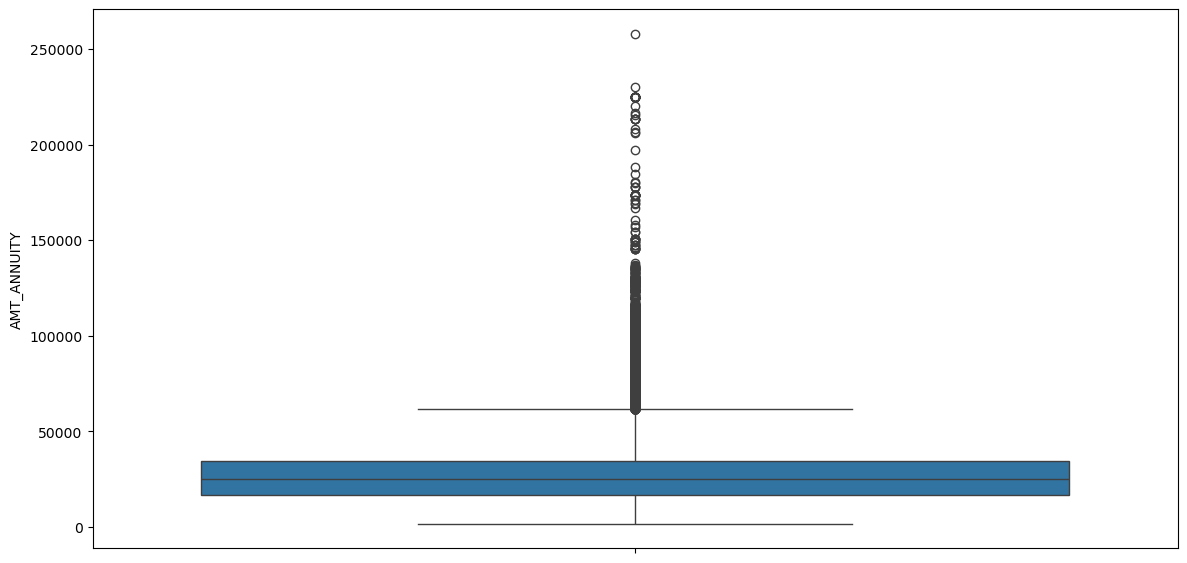

In [15]:
# checking for outliers using statistical summary of AMT_ANNUITY column and boxplot
print(app_df['AMT_ANNUITY'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))
plt.figure(figsize=[14,7])
sns.boxplot(app_df['AMT_ANNUITY'])

In [16]:
# From the above box plot shows that there are a huge number of outliers. Even the 99th percentile is also very less compared to the max value
# We can fill the null columns with median (24903.00)

In [17]:
# checking AMT_GOODS_PRICE column
app_df[app_df['AMT_GOODS_PRICE'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
724         100837       0    Revolving loans           F            N   
5937        106955       0    Revolving loans           F            N   
6425        107494       0    Revolving loans           F            N   
6703        107822       0    Revolving loans           F            N   
7647        108913       0    Revolving loans           M            N   
7880        109190       1    Revolving loans           F            N   
7995        109322       0    Revolving loans           M            N   
10819       112595       0    Revolving loans           F            N   
11287       113148       0    Revolving loans           F            N   
13008       115162       0    Revolving loans           F            N   
14699       117150       0    Revolving loans           M            N   
15953       118618       0    Revolving loans           F            N   
18935       122080       0    Revolving loans           M            N   
19178       122374       0    Revolving loans           F            N   
19921       123233       0    Revolving loans           F            N   
21193       124697       0    Revolving loans           F            N   
21338       124859       0    Revolving loans           M            N   
21546       125096       0    Revolving loans           F            N   
25391       129532       0    Revolving loans           M            N   
26398       130692       0    Revolving loans           M            N   
26736       131077       0    Revolving loans           F            N   
27003       131385       0    Revolving loans           M            N   
28201       132778       0    Revolving loans           F            N   
29059       133761       0    Revolving loans           F            N   
30164       135010       0    Revolving loans           F            N   
30294       135159       0    Revolving loans           M            N   
32143       137268       0    Revolving loans           M            N   
36250       141975       0    Revolving loans           F            N   
36721       142532       0    Revolving loans           M            N   
39230       145435       0    Revolving loans           F            N   
40571       146988       0    Revolving loans           F            N   
41099       147593       1    Revolving loans           F            N   
41161       147655       0    Revolving loans           M            N   
41982       148605       0    Revolving loans           M            N   
42024       148658       0    Revolving loans           F            N   
43630       150507       0    Revolving loans           M            N   
45657       152889       0    Revolving loans           M            N   
47627       155169       0    Revolving loans           F            N   
50540       158525       1    Revolving loans           F            N   
52711       161052       0    Revolving loans           M            N   
52955       161332       0    Revolving loans           F            N   
54045       162615       0    Revolving loans           F            N   
55600       164423       0    Revolving loans           F            N   
56002       164897       1    Revolving loans           F            N   
58595       167920       0    Revolving loans           F            N   
58653       167989       0    Revolving loans           M            N   
60622       170291       0    Revolving loans           M            N   
61022       170764       0    Revolving loans           F            N   
61072       170823       0    Revolving loans           F            N   
61618       171462       0    Revolving loans           M            N   
63319       173434       0    Revolving loans           F            N   
64118       174350       0    Revolving loans           F            N   
64184       174427       0    Revolving loans           F            N   
66168       

count     307233.00
mean      538396.21
std       369446.46
min        40500.00
10%       180000.00
25%       238500.00
50%       450000.00
75%       679500.00
99%      1800000.00
max      4050000.00
Name: AMT_GOODS_PRICE, dtype: float64


<Axes: ylabel='AMT_GOODS_PRICE'>

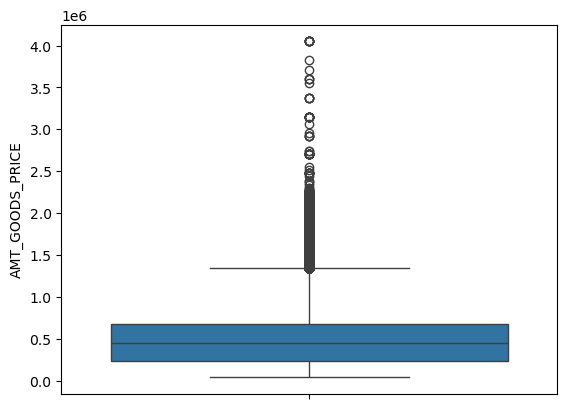

In [18]:
# checking for outliers for of AMT_GOODS_PRICE column and boxplot
print(round(app_df['AMT_GOODS_PRICE'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]),2))
sns.boxplot(app_df['AMT_GOODS_PRICE'])

In [19]:
# As compared to AMT_ANNUITY column here also we can find a large number of outliersabs
# and the 99th percentile is very far from the max value
# So we can replace the null values with median

In [20]:
# checking for maximum repeated value in NAME_TYPE_SUITE
print(app_df['NAME_TYPE_SUITE'].value_counts())
print('most repeated word :',app_df['NAME_TYPE_SUITE'].mode()[0])

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64
most repeated word : Unaccompanied


In [21]:
# Here we can clearly see that the most repeated word is 'Unaccompanied'
# Since the total number of 'Unaccompanied' is more than 6 times the second most repeated value, we can replace the null columns with 'Unaccompanied'

In [22]:
# checking AMT_GOODS_PRICE column
app_df[app_df['CNT_FAM_MEMBERS'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
41982       148605       0    Revolving loans           M            N   
187348      317181       0    Revolving loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
41982                Y             0          450000.0    675000.0   
187348               Y             0          202500.0    585000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
41982       33750.0              NaN             NaN  Commercial associate   
187348      29250.0              NaN             NaN  Commercial associate   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
41982      Lower secondary            Unknown  Municipal apartment   
187348    Higher education            Unknown    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
41982                     0.015221      -12396          -1161   
187348                    0.031329      -12844           -232   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
41982             -3265.0            -4489           1               1   
187348            -1597.0            -1571           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
41982                 1                 1           1           0   
187348                0                 1           0           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
41982         Managers              NaN                     2   
187348     Accountants              NaN                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
41982                             2                   THURSDAY   
187348                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
41982                        15                           0   
187348                       14                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
41982                            1                            1   
187348                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
41982                        0                       1   
187348                       0                       0   

        LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  \
41982                         1               Insurance      0.700618   
187348                        0  Business Entity Type 2      0.645168   

        EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
41982            NaN                          NaN            NaN   
187348      0.670652                        0.997          0.375   

        YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  \
41982                            NaN             NaN   
187348                         0.997           0.375   

        YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE  \
41982                            NaN             NaN             NaN   
187348                         0.997           0.375          0.0791   

       EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  \
41982                  NaN                       3.0   
187348                  No                       1.0   

        DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
41982                        0.0                       3.0   
187348                       0.0                       1.0   

        DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  \
41982                        0.0                  -876.0                0   
187348                       0.0                  -654.0                0   

        FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
41982                 0                0                1     

count    307509.00
mean          2.15
std           0.91
min           1.00
10%           1.00
25%           2.00
50%           2.00
75%           3.00
99%           5.00
max          20.00
Name: CNT_FAM_MEMBERS, dtype: float64


<Axes: ylabel='CNT_FAM_MEMBERS'>

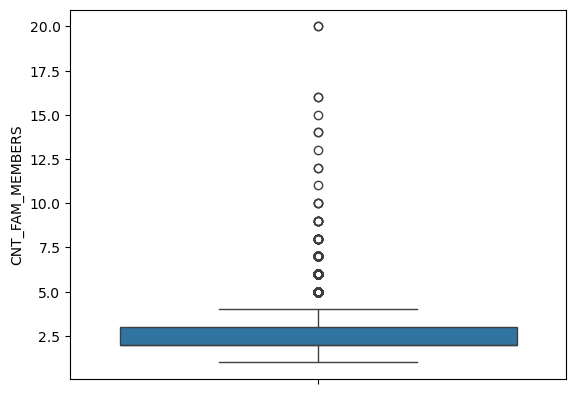

In [23]:
# checking for outliers using statistical summary of CNT_FAM_MEMBERS column and boxplot
print(round(app_df['CNT_FAM_MEMBERS'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]),2))
sns.boxplot(app_df['CNT_FAM_MEMBERS'])

In [24]:
# Considering the count of family members, even though the 99th percentile is far from the max value 20 members is also possible
# Since we have only 2 rows with null values, we can fill it with 0

In [25]:
app_df['OCCUPATION_TYPE'].isna().sum()

96391

In [26]:
# checking for maximum repeated value in OCCUPATION_TYPE
print(app_df['OCCUPATION_TYPE'].value_counts())
print('most repeated OCCUPATION_TYPE :',app_df['OCCUPATION_TYPE'].mode()[0])

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64
most repeated OCCUPATION_TYPE : Laborers


In [27]:
# Here the majority of the people who applied for the loan are laborers
# In this case there are 96391 null rows present. So the total number od null values are way more than the maximum employees.
# So to fill the null values with any occupation will cause a misleading report.
# We can fill the columns with 'Unknown'
# Use .loc for modifying the column
app_df.loc[:, 'OCCUPATION_TYPE'] = app_df['OCCUPATION_TYPE'].fillna(value='Unknown')

In [28]:
print(app_df['OCCUPATION_TYPE'].value_counts())

OCCUPATION_TYPE
Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64


In [29]:
# checking the null values after replacing 'Unknown' to occupation
app_df['OCCUPATION_TYPE'].isna().sum()

0

<Axes: xlabel='count', ylabel='OCCUPATION_TYPE'>

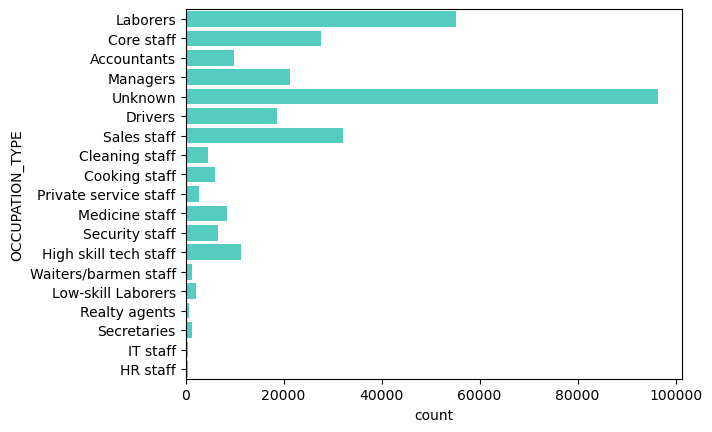

In [30]:
sns.countplot(data = app_df, y = "OCCUPATION_TYPE", color = "turquoise")

In [31]:
app_df['EXT_SOURCE_2'].isna().sum()

660

count    306851.0000
mean          0.5144
std           0.1911
min           0.0000
10%           0.2157
25%           0.3925
50%           0.5660
75%           0.6636
99%           0.7828
max           0.8550
Name: EXT_SOURCE_2, dtype: float64


<Axes: ylabel='EXT_SOURCE_2'>

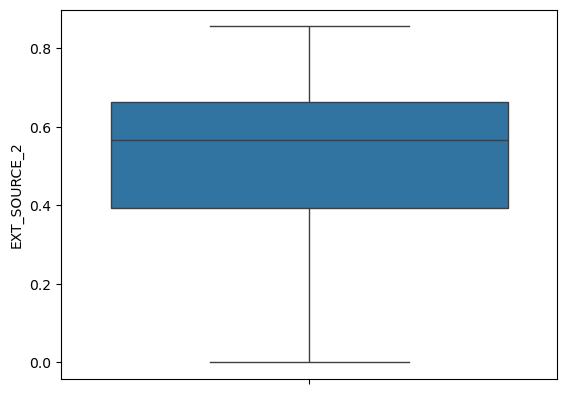

In [32]:
print(round(app_df['EXT_SOURCE_2'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]),4))
sns.boxplot(app_df['EXT_SOURCE_2'])

In [33]:
# Here we cant see any outliers and there is no much difference between the 99th percentile and max value
# so that we can replace the null values by mean value of 0.5660

count     307511.00
mean      599026.00
std       402490.78
min        45000.00
10%       180000.00
25%       270000.00
50%       513531.00
75%       808650.00
99%      1854000.00
max      4050000.00
Name: AMT_CREDIT, dtype: float64


<Axes: ylabel='AMT_CREDIT'>

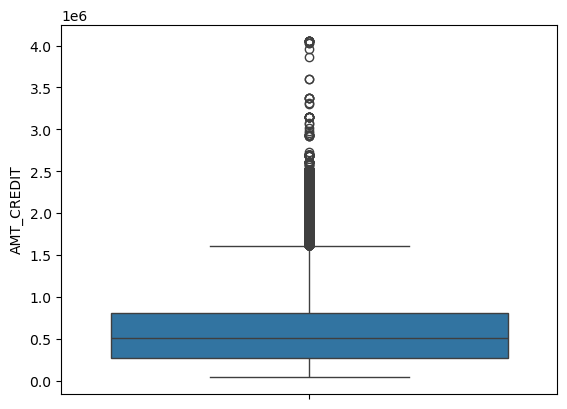

In [34]:
print(round(app_df['AMT_CREDIT'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]),2))
sns.boxplot(app_df['AMT_CREDIT'])

In [35]:
# Here there are too much outliers and the max value is mothe than double the value of 99th percentile
# we can replace the null values with the mean

count    246546.0000
mean          0.5109
std           0.1948
min           0.0005
10%           0.2276
25%           0.3706
50%           0.5353
75%           0.6691
99%           0.8328
max           0.8960
Name: EXT_SOURCE_3, dtype: float64


<Axes: ylabel='EXT_SOURCE_3'>

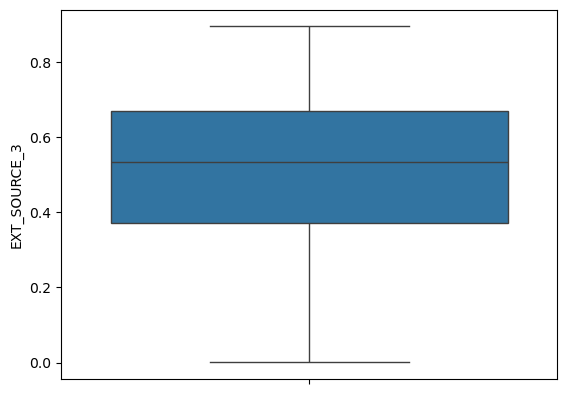

In [36]:
print(round(app_df['EXT_SOURCE_3'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]),4))
sns.boxplot(app_df['EXT_SOURCE_3'])

In [37]:
# since this column has more than 19% of null values even though there is no null values, we can drop the column

In [38]:
# 'AMT_REQ_CREDIT_BUREAU_YEAR',
# 'AMT_REQ_CREDIT_BUREAU_QRT',
# 'AMT_REQ_CREDIT_BUREAU_MON',
# 'AMT_REQ_CREDIT_BUREAU_WEEK',
# 'AMT_REQ_CREDIT_BUREAU_DAY',
# 'AMT_REQ_CREDIT_BUREAU_HOUR'
# All the above columns have same number of null values which is 41519
app_df[['AMT_REQ_CREDIT_BUREAU_YEAR',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_HOUR']].describe()

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_QRT  \
count               265992.000000              265992.000000   
mean                     1.899974                   0.265474   
std                      1.869295                   0.794056   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      1.000000                   0.000000   
75%                      3.000000                   0.000000   
max                     25.000000                 261.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
mean                    0.267395                    0.034362   
std                     0.916002                    0.204685   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                    27.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  
count              265992.000000               265992.000000  
mean                    0.007000                    0.006402  
std                     0.110757                    0.083849  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    0.000000  
75%                     0.000000                    0.000000  
max                     9.000000                    4.000000

In [39]:
# As it has over 13% of null values we are nor replacing the data

count    306490.00
mean          1.42
std           2.40
min           0.00
10%           0.00
25%           0.00
50%           0.00
75%           2.00
99%          10.00
max         348.00
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


<Axes: ylabel='OBS_30_CNT_SOCIAL_CIRCLE'>

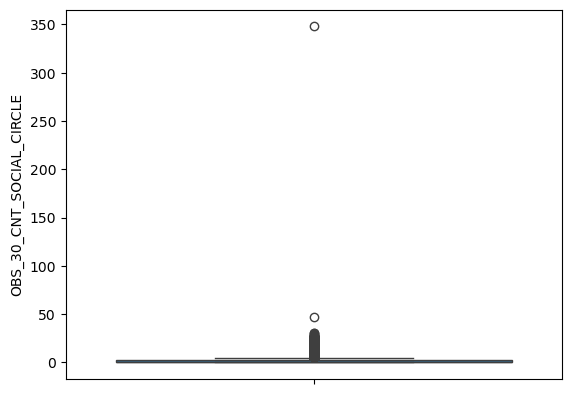

In [40]:
print(round(app_df['OBS_30_CNT_SOCIAL_CIRCLE'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]),2))
sns.boxplot(app_df['OBS_30_CNT_SOCIAL_CIRCLE'])

In [41]:
# Since there are only 2 outliers and the null value percentage is also low we can replace it by median

In [42]:
# checking the unique elements of gender
app_df.CODE_GENDER.unique()

array(['M', 'F', 'XNA'], dtype=object)

In [43]:
# checking the rows where gender is XNA
app_df[app_df['CODE_GENDER'] == 'XNA']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
35657       141289       0    Revolving loans         XNA            Y   
38566       144669       0    Revolving loans         XNA            N   
83382       196708       0    Revolving loans         XNA            N   
189640      319880       0    Revolving loans         XNA            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
35657                Y             0          207000.0    382500.0   
38566                Y             2          157500.0    270000.0   
83382                Y             1          135000.0    405000.0   
189640               Y             0          247500.0    540000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
35657       19125.0         337500.0   Unaccompanied               Working   
38566       13500.0         225000.0          Family               Working   
83382       20250.0         225000.0   Unaccompanied               Working   
189640      27000.0         900000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
35657   Secondary / secondary special            Married  Municipal apartment   
38566   Secondary / secondary special            Married    House / apartment   
83382                Higher education            Married    House / apartment   
189640              Incomplete higher     Civil marriage    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
35657                     0.020713      -20232         -10044   
38566                     0.026392      -13717          -2797   
83382                     0.035792      -10647          -1228   
189640                    0.035792       -9649          -2293   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
35657            -10024.0            -3537           1               1   
38566             -2241.0            -4659           1               1   
83382              -183.0            -1671           1               1   
189640            -4099.0            -2326           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
35657                 1                 1           1           0   
38566                 1                 1           1           0   
83382                 1                 1           1           0   
189640                1                 1           1           0   

           OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
35657              Unknown              2.0                     3   
38566   Low-skill Laborers              4.0                     2   
83382           Core staff              3.0                     2   
189640             Unknown              2.0                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
35657                             3                    TUESDAY   
38566                             2                     FRIDAY   
83382                             2                   THURSDAY   
189640                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
35657                        10                           0   
38566                        16                           0   
83382                        15                           0   
189640                       15                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
35657                            0                            0   
38566                            0                            0   
83382                            0                            0   
189640                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
35657                        0                       0   
3

In [44]:
print(app_df['CODE_GENDER'].value_counts())

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64


In [45]:
# since XNA is 4 and female count is comparitively low, we can replace it by 'F'

In [46]:
# we have evaluated with the null columns
# no we can find the correlation of the columns which affects target variable

In [47]:
print("Duplicate data: ", app_df.duplicated().sum())
# there is no duplicate rows present

Duplicate data:  0


In [48]:
print(app_df.corr(numeric_only=True)['TARGET'].sort_values(ascending=False))

TARGET                          1.000000
DAYS_BIRTH                      0.078239
REGION_RATING_CLIENT_W_CITY     0.060893
REGION_RATING_CLIENT            0.058899
DAYS_LAST_PHONE_CHANGE          0.055218
DAYS_ID_PUBLISH                 0.051457
REG_CITY_NOT_WORK_CITY          0.050994
FLAG_EMP_PHONE                  0.045982
REG_CITY_NOT_LIVE_CITY          0.044395
FLAG_DOCUMENT_3                 0.044346
DAYS_REGISTRATION               0.041975
LIVE_CITY_NOT_WORK_CITY         0.032518
DEF_30_CNT_SOCIAL_CIRCLE        0.032248
DEF_60_CNT_SOCIAL_CIRCLE        0.031276
FLAG_WORK_PHONE                 0.028524
AMT_REQ_CREDIT_BUREAU_YEAR      0.019930
CNT_CHILDREN                    0.019187
CNT_FAM_MEMBERS                 0.009308
OBS_30_CNT_SOCIAL_CIRCLE        0.009131
OBS_60_CNT_SOCIAL_CIRCLE        0.009022
REG_REGION_NOT_WORK_REGION      0.006942
REG_REGION_NOT_LIVE_REGION      0.005576
FLAG_DOCUMENT_2                 0.005417
FLAG_DOCUMENT_21                0.003709
LIVE_REGION_NOT_

In [49]:
app_df.loc[:, 'DAYS_BIRTH'] = app_df['DAYS_BIRTH'].abs()
app_df.loc[:, 'DAYS_EMPLOYED'] = app_df['DAYS_EMPLOYED'].abs()
app_df.loc[:, 'DAYS_ID_PUBLISH'] = app_df['DAYS_ID_PUBLISH'].abs()
app_df.loc[:, 'DAYS_LAST_PHONE_CHANGE'] = app_df['DAYS_LAST_PHONE_CHANGE'].abs()
# these columns cant be negative so replacing by absolute values

In [50]:
app_df.DAYS_BIRTH.describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: YEARS_BIRTH, dtype: float64


<Axes: xlabel='YEARS_BIRTH'>

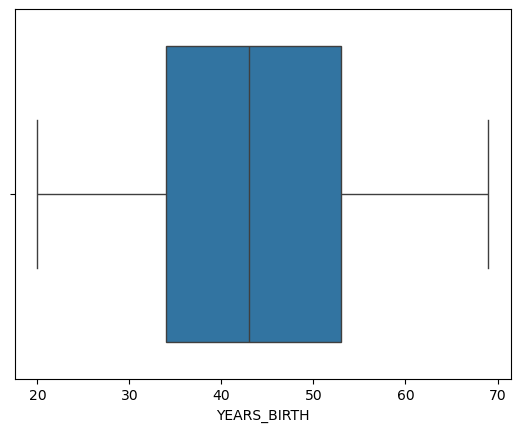

In [258]:
app_df.loc[:, 'YEARS_BIRTH'] = app_df['DAYS_BIRTH'] // 365
print(app_df['YEARS_BIRTH'].describe())
sns.boxplot(data=app_df, x='YEARS_BIRTH')

In [52]:
print(app_df.corr(numeric_only=True)['TARGET'].sort_values(ascending=False))

TARGET                          1.000000
REGION_RATING_CLIENT_W_CITY     0.060893
REGION_RATING_CLIENT            0.058899
REG_CITY_NOT_WORK_CITY          0.050994
FLAG_EMP_PHONE                  0.045982
REG_CITY_NOT_LIVE_CITY          0.044395
FLAG_DOCUMENT_3                 0.044346
DAYS_REGISTRATION               0.041975
LIVE_CITY_NOT_WORK_CITY         0.032518
DEF_30_CNT_SOCIAL_CIRCLE        0.032248
DEF_60_CNT_SOCIAL_CIRCLE        0.031276
FLAG_WORK_PHONE                 0.028524
AMT_REQ_CREDIT_BUREAU_YEAR      0.019930
CNT_CHILDREN                    0.019187
CNT_FAM_MEMBERS                 0.009308
OBS_30_CNT_SOCIAL_CIRCLE        0.009131
OBS_60_CNT_SOCIAL_CIRCLE        0.009022
REG_REGION_NOT_WORK_REGION      0.006942
REG_REGION_NOT_LIVE_REGION      0.005576
FLAG_DOCUMENT_2                 0.005417
FLAG_DOCUMENT_21                0.003709
LIVE_REGION_NOT_WORK_REGION     0.002819
AMT_REQ_CREDIT_BUREAU_DAY       0.002704
AMT_REQ_CREDIT_BUREAU_HOUR      0.000930
AMT_REQ_CREDIT_B

In [53]:
# checking the NAME_FAMILY_STATUS of applicants
app_df['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

In [54]:
# since 2 person's family status is 'unknown' we cant just allocate them to any category so we fill it with single

count    307511.000000
mean        185.021521
std         381.972190
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max        1000.000000
Name: YEARS_EMPLOYED, dtype: float64


<Axes: xlabel='YEARS_EMPLOYED'>

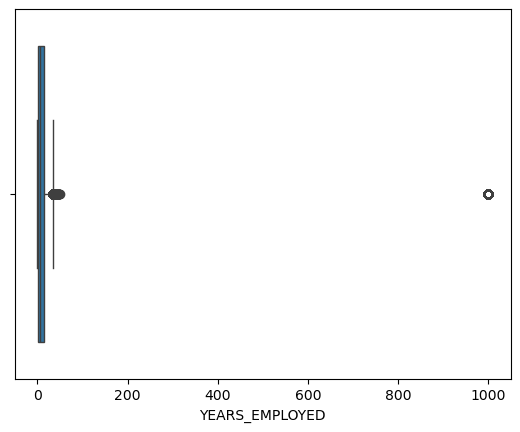

In [256]:
app_df.loc[:, 'YEARS_EMPLOYED'] = app_df['DAYS_EMPLOYED'] // 365
print(app_df['YEARS_EMPLOYED'].describe())
sns.boxplot(data=app_df, x='YEARS_EMPLOYED')

In [56]:
app_df.YEARS_EMPLOYED.value_counts()

YEARS_EMPLOYED
1000    55374
1       31841
2       29648
0       27904
3       25107
4       21767
5       16271
6       15051
7       13148
8       11440
9        8980
10       7364
11       5902
12       5309
14       4643
13       4349
15       2725
16       2335
17       2006
18       1918
19       1871
20       1600
21       1461
22       1253
23       1016
24        914
25        821
27        656
26        653
28        611
29        567
30        457
31        437
34        364
32        351
33        331
35        257
36        196
37        138
39        125
38        116
40         59
41         59
42         42
44         31
43         19
45         14
48          4
46          4
47          1
49          1
Name: count, dtype: int64

In [57]:
# 55374 persons in this data shows 1000 as total no of employment which is a wrong entry and also an outlier

count    307511.000000
mean          7.713474
std           4.134515
min           0.000000
25%           4.000000
50%           8.000000
75%          11.000000
max          19.000000
Name: YEARS_ID_PUBLISH, dtype: float64


<Axes: xlabel='YEARS_ID_PUBLISH'>

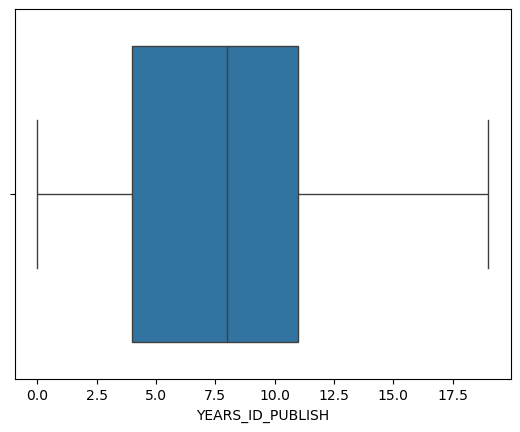

In [254]:
# creating a new column YEARS_ID_PUBLISH for ease of analysis
app_df.loc[:,'YEARS_ID_PUBLISH'] = app_df['DAYS_ID_PUBLISH'] // 365
print(app_df['YEARS_ID_PUBLISH'].describe())
sns.boxplot(data=app_df, x='YEARS_ID_PUBLISH')

In [59]:
# there are no outliersArithmeticError

count    307510.000000
mean          2.225115
std           2.193678
min           0.000000
25%           0.000000
50%           2.000000
75%           4.000000
max          11.000000
Name: YEARS_LAST_PHONE_CHANGE, dtype: float64


<Axes: xlabel='YEARS_LAST_PHONE_CHANGE'>

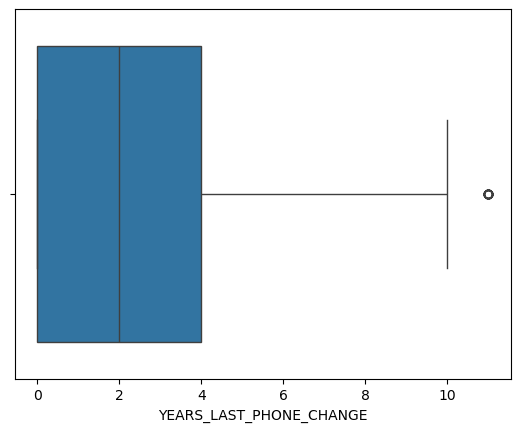

In [252]:
# creating a new column YEARS_LAST_PHONE_CHANGE for ease of analysis
app_df.loc[:,'YEARS_LAST_PHONE_CHANGE'] = app_df['DAYS_LAST_PHONE_CHANGE'] // 365
print(app_df['YEARS_LAST_PHONE_CHANGE'].describe())
sns.boxplot(data=app_df, x='YEARS_LAST_PHONE_CHANGE')

In [61]:
app_df.YEARS_LAST_PHONE_CHANGE.value_counts()

YEARS_LAST_PHONE_CHANGE
0.0     92451
1.0     57641
4.0     38061
2.0     37939
3.0     29929
5.0     22131
6.0     15203
7.0      8316
8.0      4193
9.0      1423
10.0      194
11.0       29
Name: count, dtype: int64

In [62]:
# there are 29 outliers having value 11
# most of the applicants who have changed their phones fall between 0-4 years

Text(0.5, 0, '\n 0 - On-time Payment clients   :   1 - Clients with Payment Difficulty')

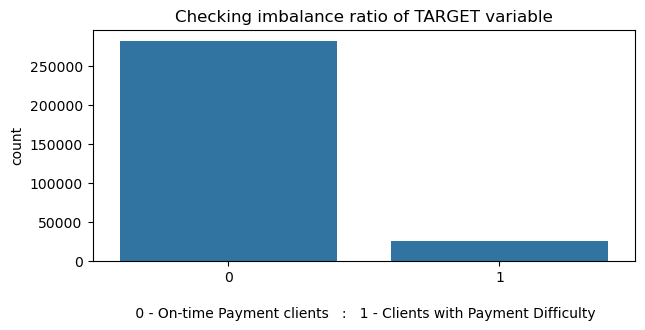

In [63]:
# checking the count of target variable
plt.figure(figsize = [7,3])
sns.countplot(data=app_df, x='TARGET')
plt.title("Checking imbalance ratio of TARGET variable")
plt.xlabel("\n 0 - On-time Payment clients   :   1 - Clients with Payment Difficulty")

In [64]:
app_df.TARGET.value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [65]:
# target column has 2 values
# 1 indicates the clients with payment difficulty, late payment or cancelled payment
# 0 indicates on time payment clients

In [66]:
# the ratio between on-time payment clients vs clients with payment difficulty
282686/24825

11.387150050352467

In [67]:
# to check in percentage
print(app_df['TARGET'].value_counts(normalize=True)*100)

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64


In [68]:
# 91.92% clients are on time payers
# 8.07% clients have difficulty in paying loan

In [69]:
# creating new dataframe with TARGET value 
df0 = app_df[app_df['TARGET'] == 0]
df1 = app_df[app_df['TARGET'] == 1]

In [70]:
# analysis on the categorical column
# checking all columns with object type data(string) and storing it in a list
obj_plot=list(app_df.columns[app_df.dtypes=="object"])
obj_plot

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE']

In [71]:
# checking each columns underlying groups
for i in obj_plot:
    # for clients with payment difficulties
    print("--------------------------------------------------")
    print(f"{i} for clients with payment difficulties")
    print(df1[i].value_counts().sort_values(ascending = False))
    # for on-time payment clients
    print(f"\n{i} for on-time payment clients")
    print(df0[i].value_counts().sort_values(ascending = False))

--------------------------------------------------
NAME_CONTRACT_TYPE for clients with payment difficulties
NAME_CONTRACT_TYPE
Cash loans         23221
Revolving loans     1604
Name: count, dtype: int64

NAME_CONTRACT_TYPE for on-time payment clients
NAME_CONTRACT_TYPE
Cash loans         255011
Revolving loans     27675
Name: count, dtype: int64
--------------------------------------------------
CODE_GENDER for clients with payment difficulties
CODE_GENDER
F    14170
M    10655
Name: count, dtype: int64

CODE_GENDER for on-time payment clients
CODE_GENDER
F      188278
M       94404
XNA         4
Name: count, dtype: int64
--------------------------------------------------
FLAG_OWN_CAR for clients with payment difficulties
FLAG_OWN_CAR
N    17249
Y     7576
Name: count, dtype: int64

FLAG_OWN_CAR for on-time payment clients
FLAG_OWN_CAR
N    185675
Y     97011
Name: count, dtype: int64
--------------------------------------------------
FLAG_OWN_REALTY for clients with payment difficulti

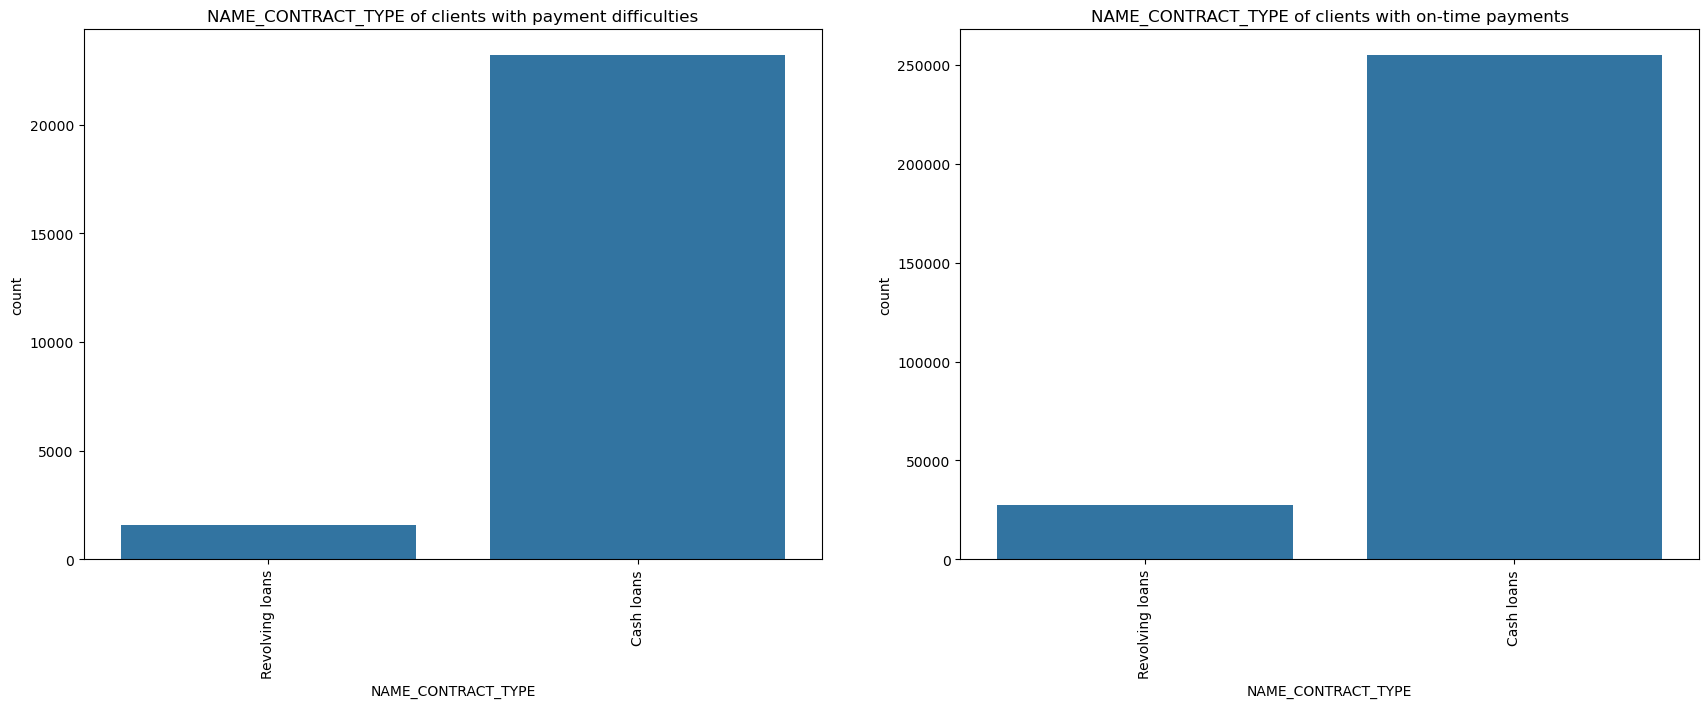

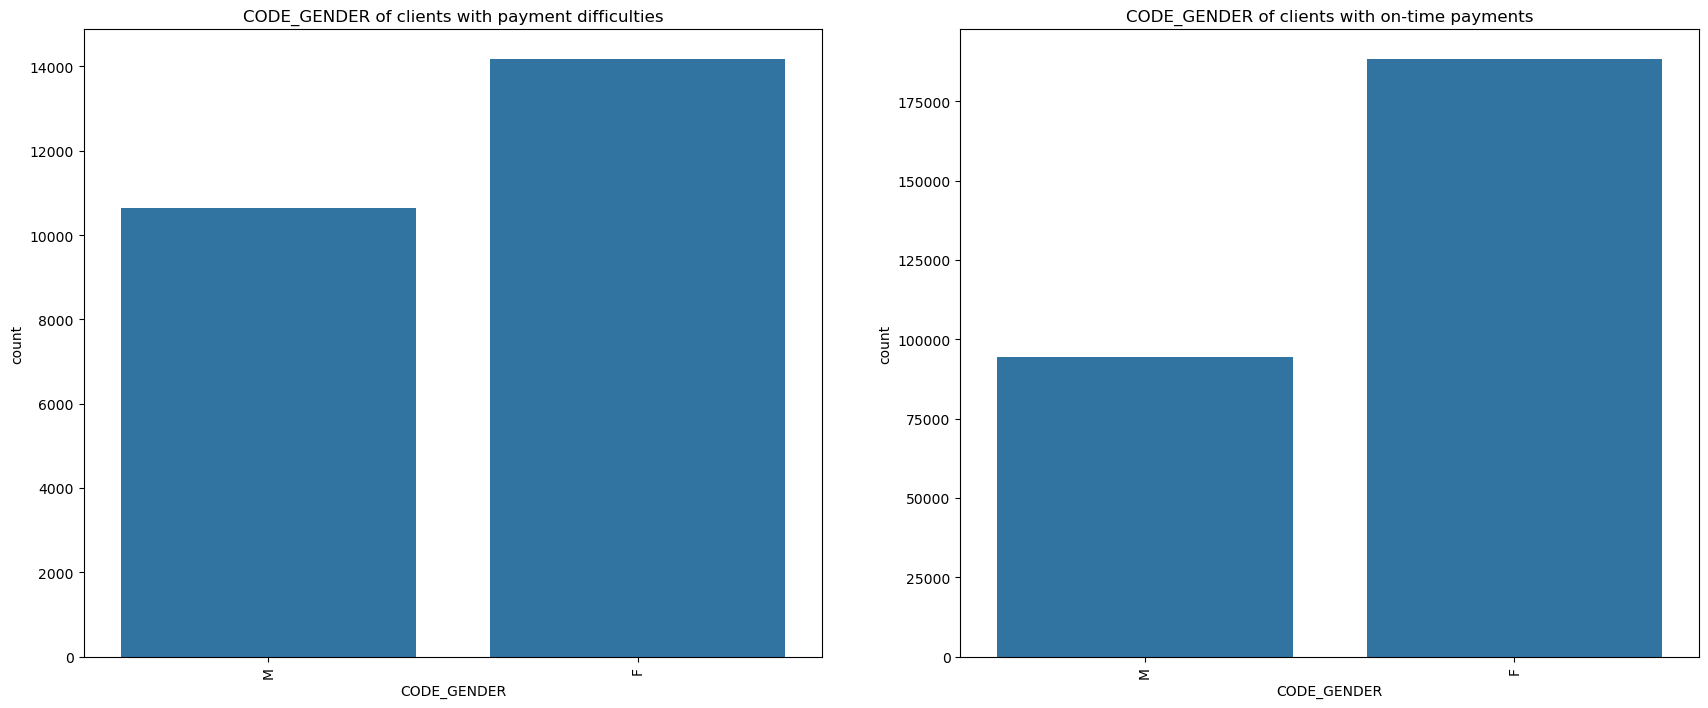

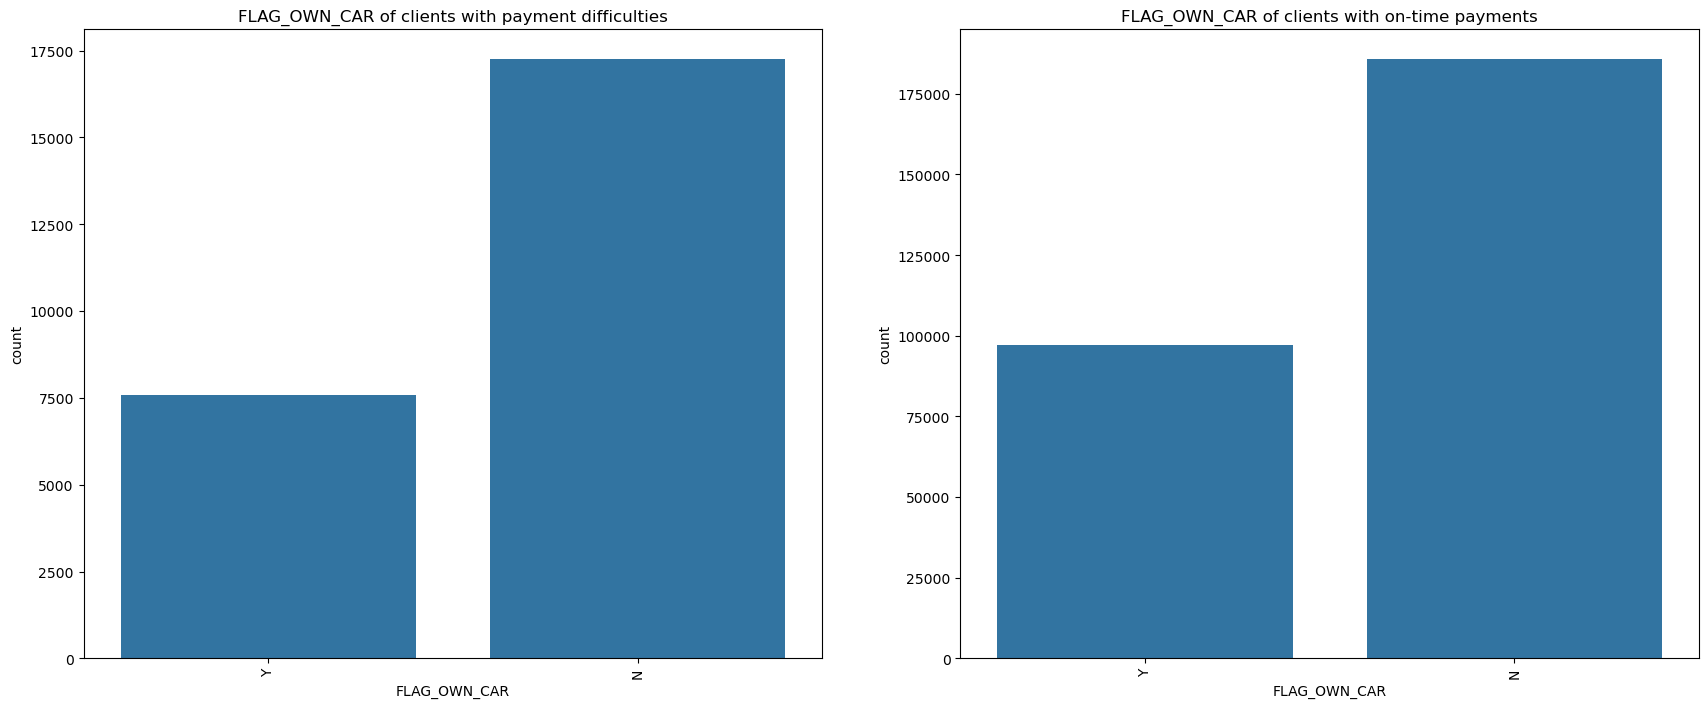

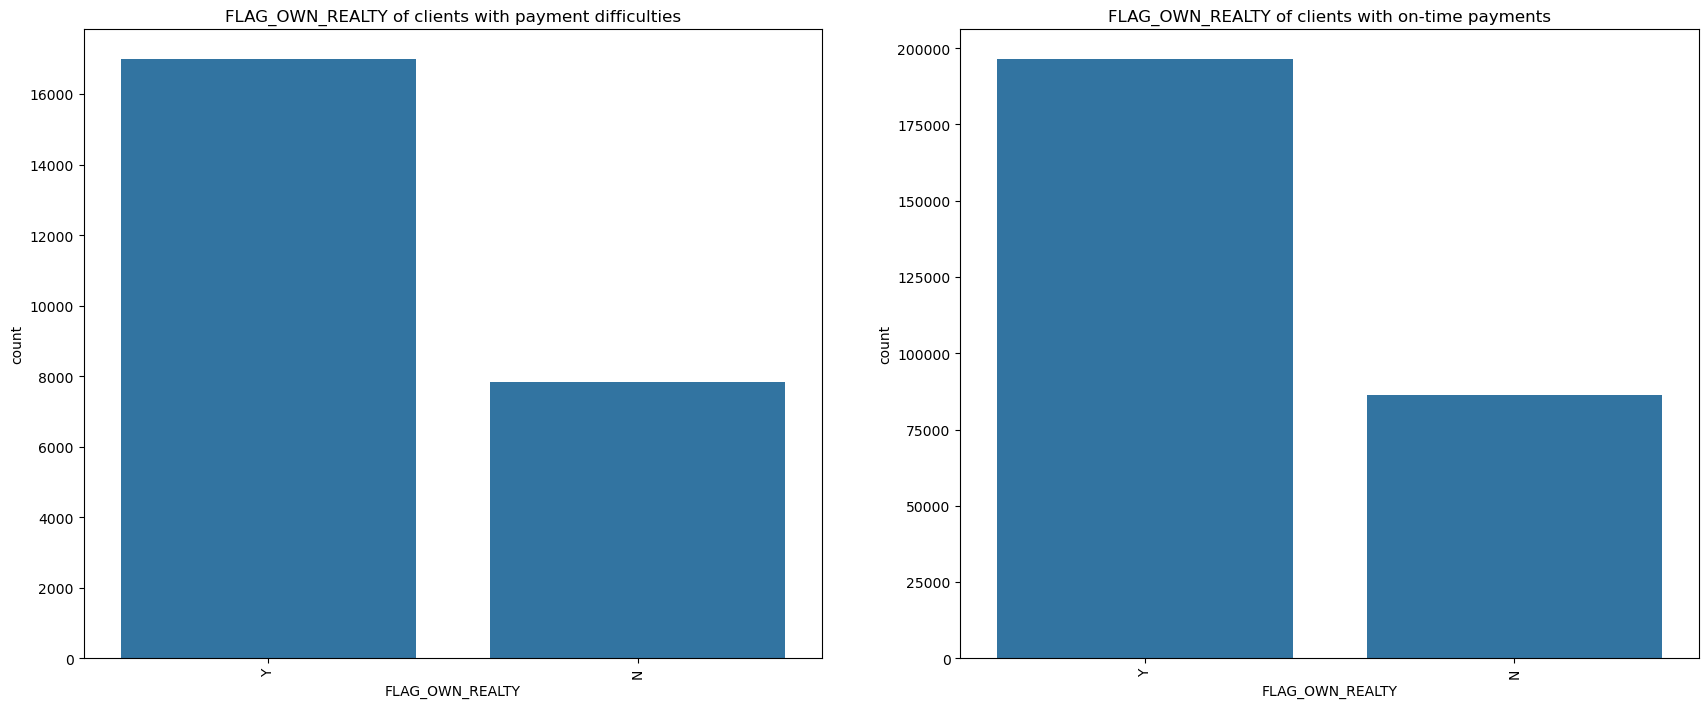

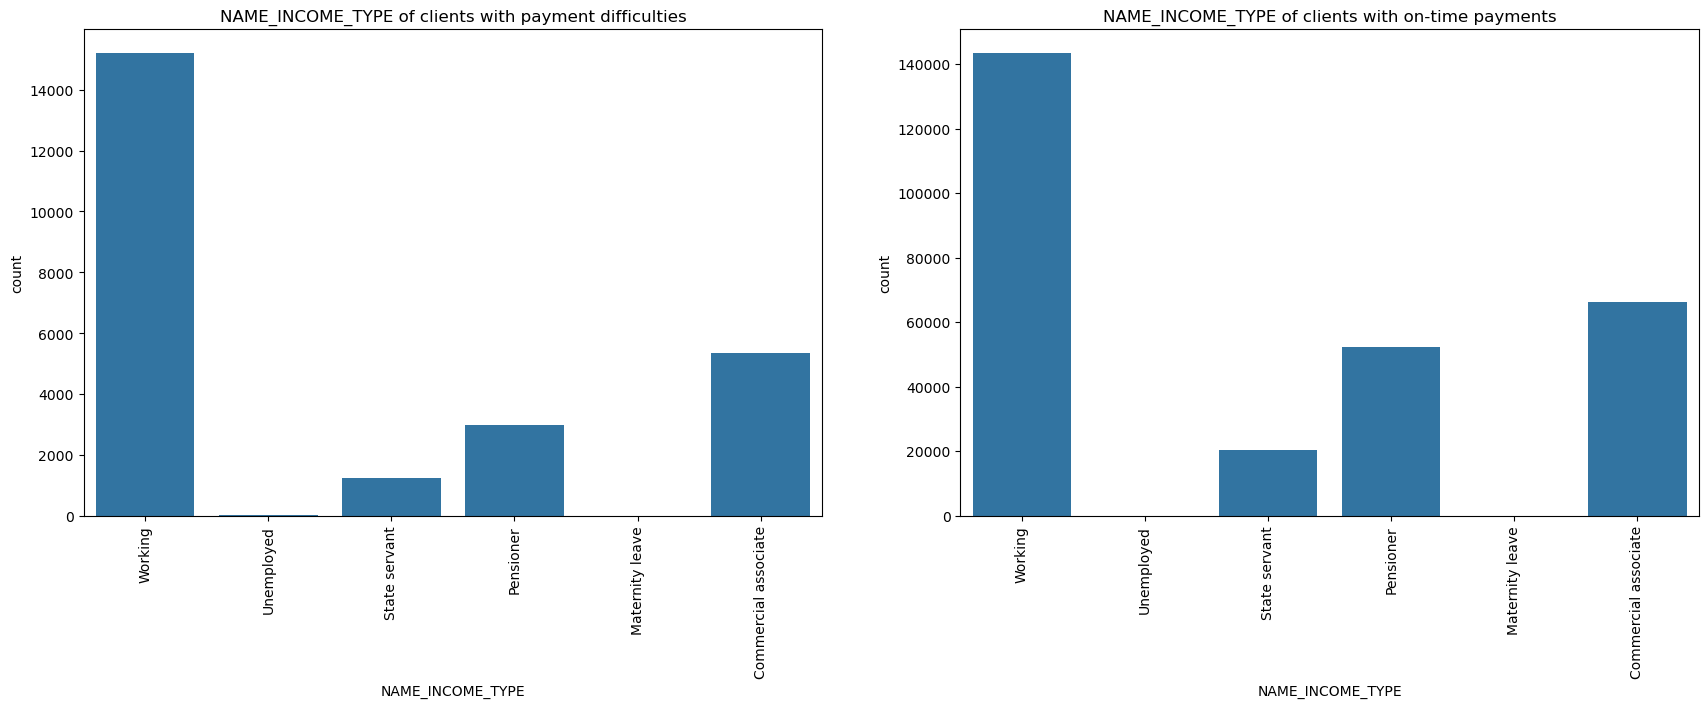

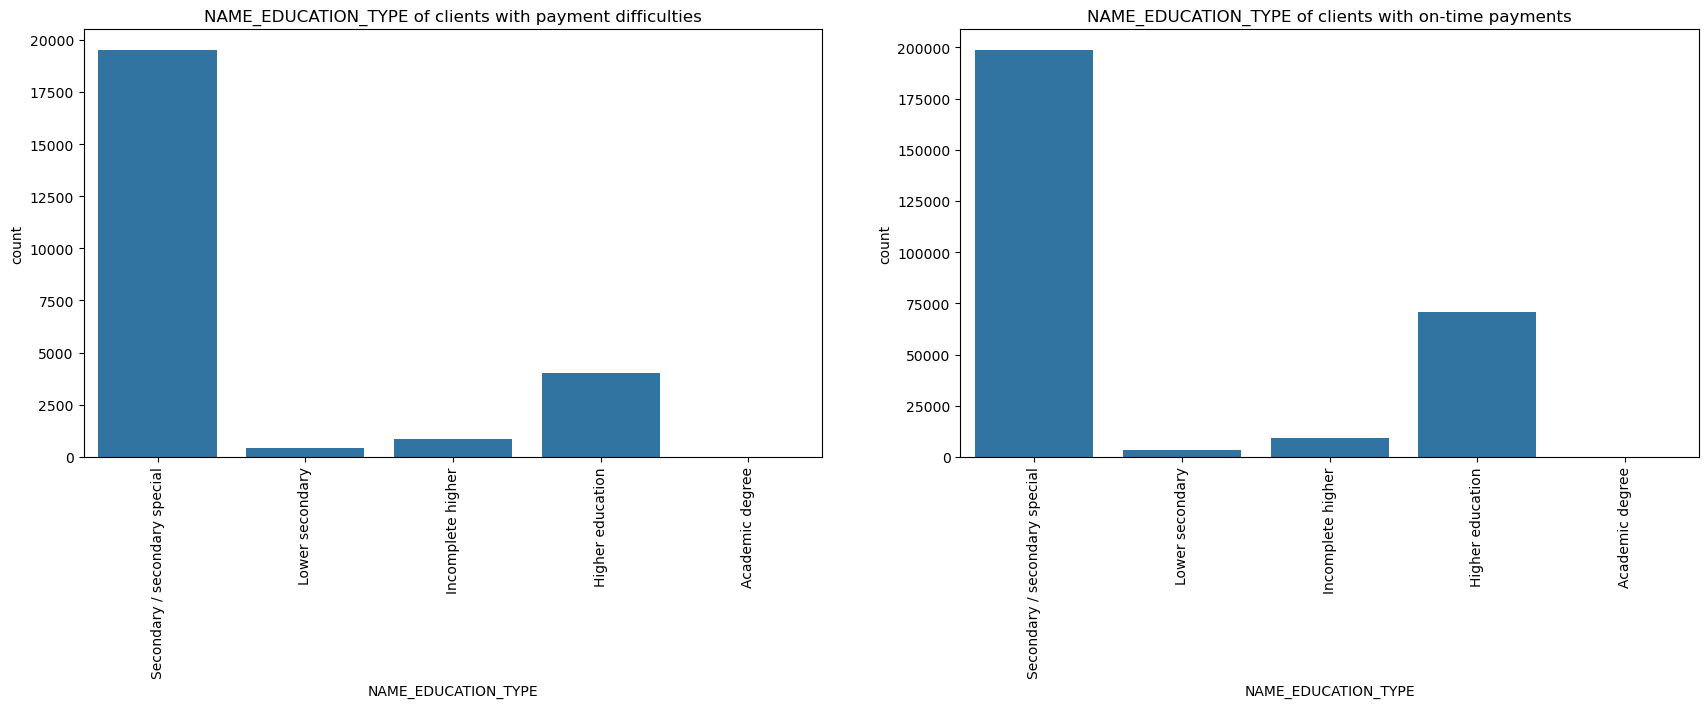

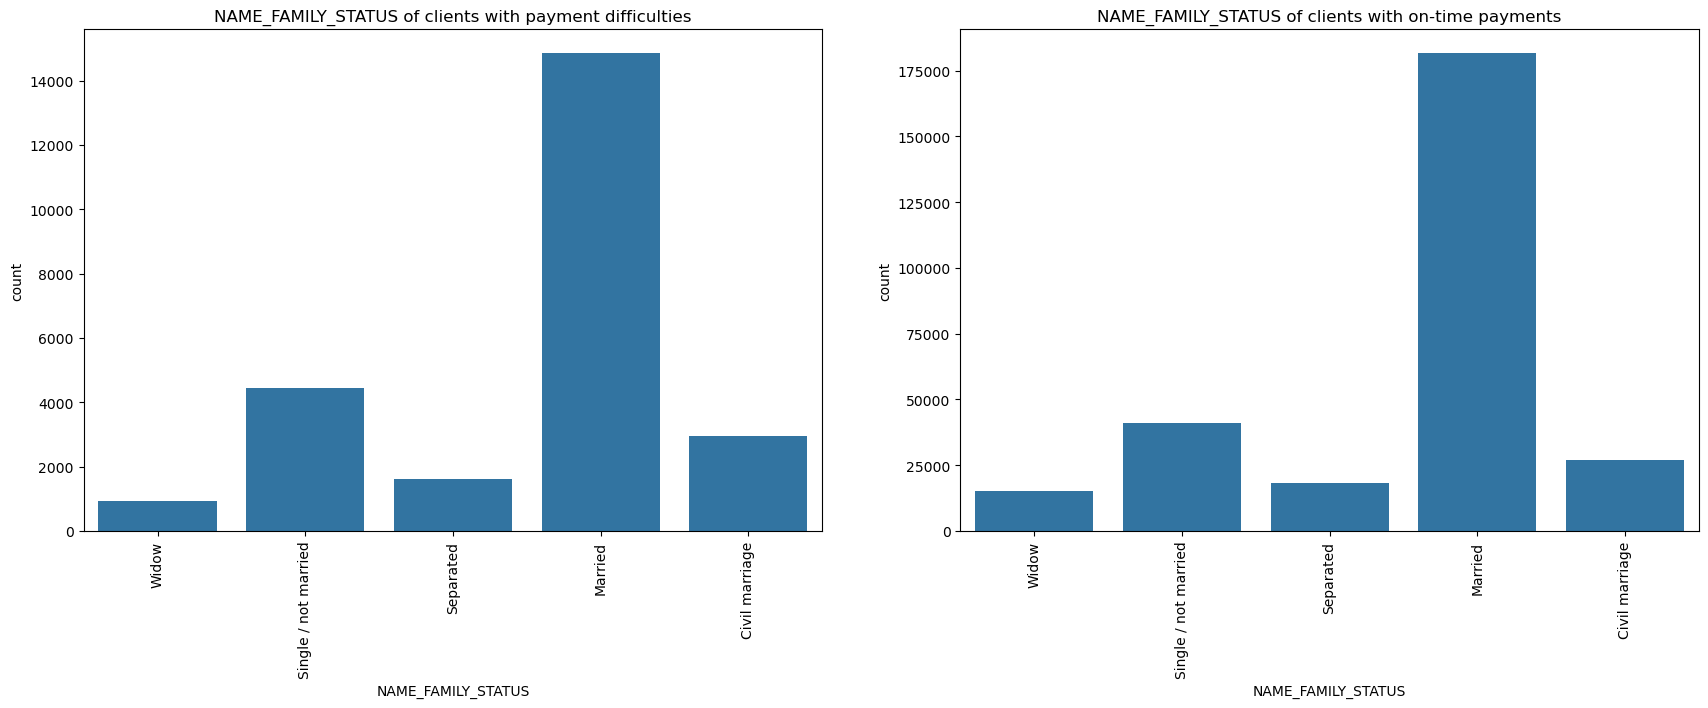

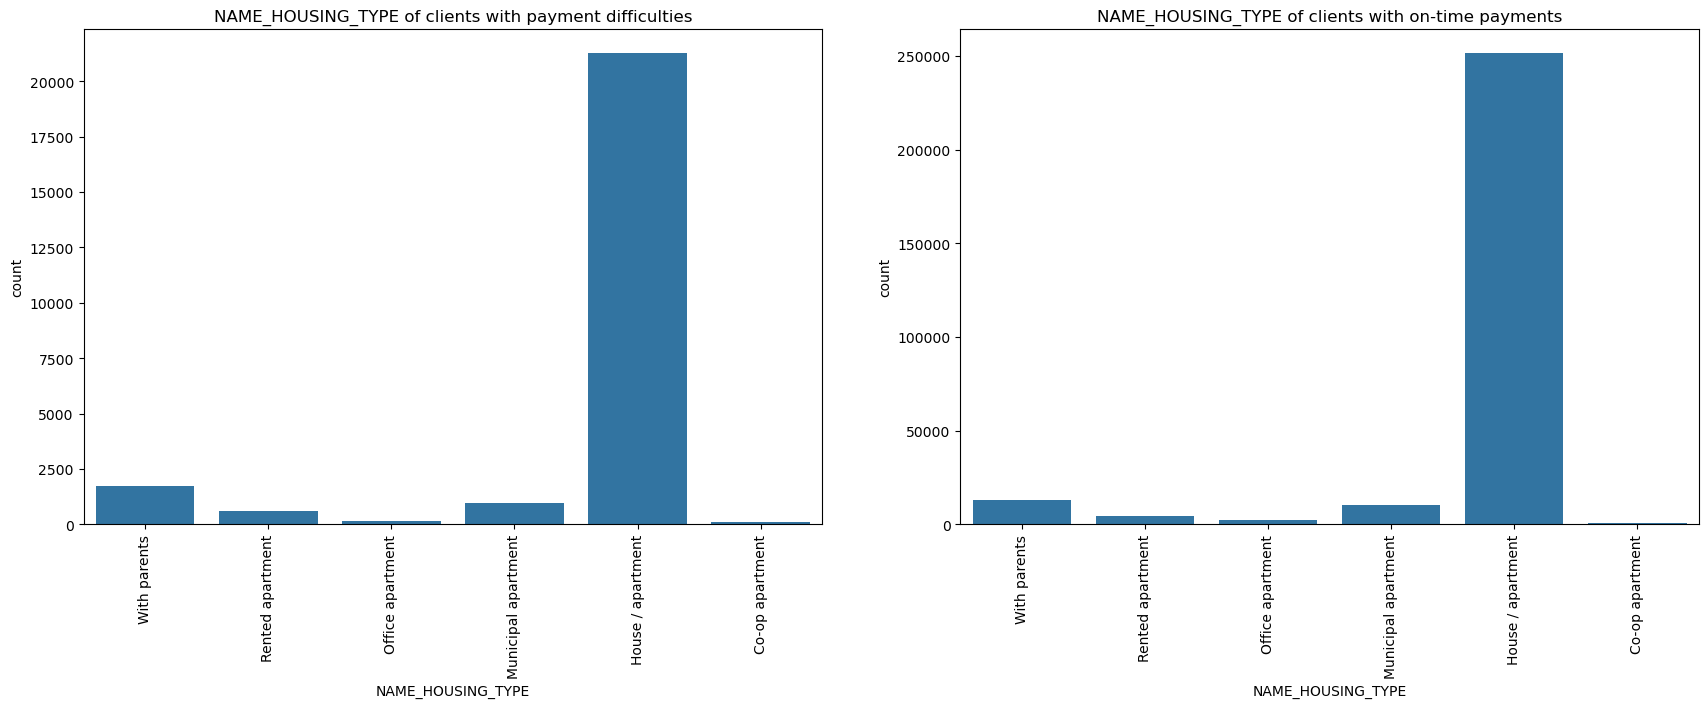

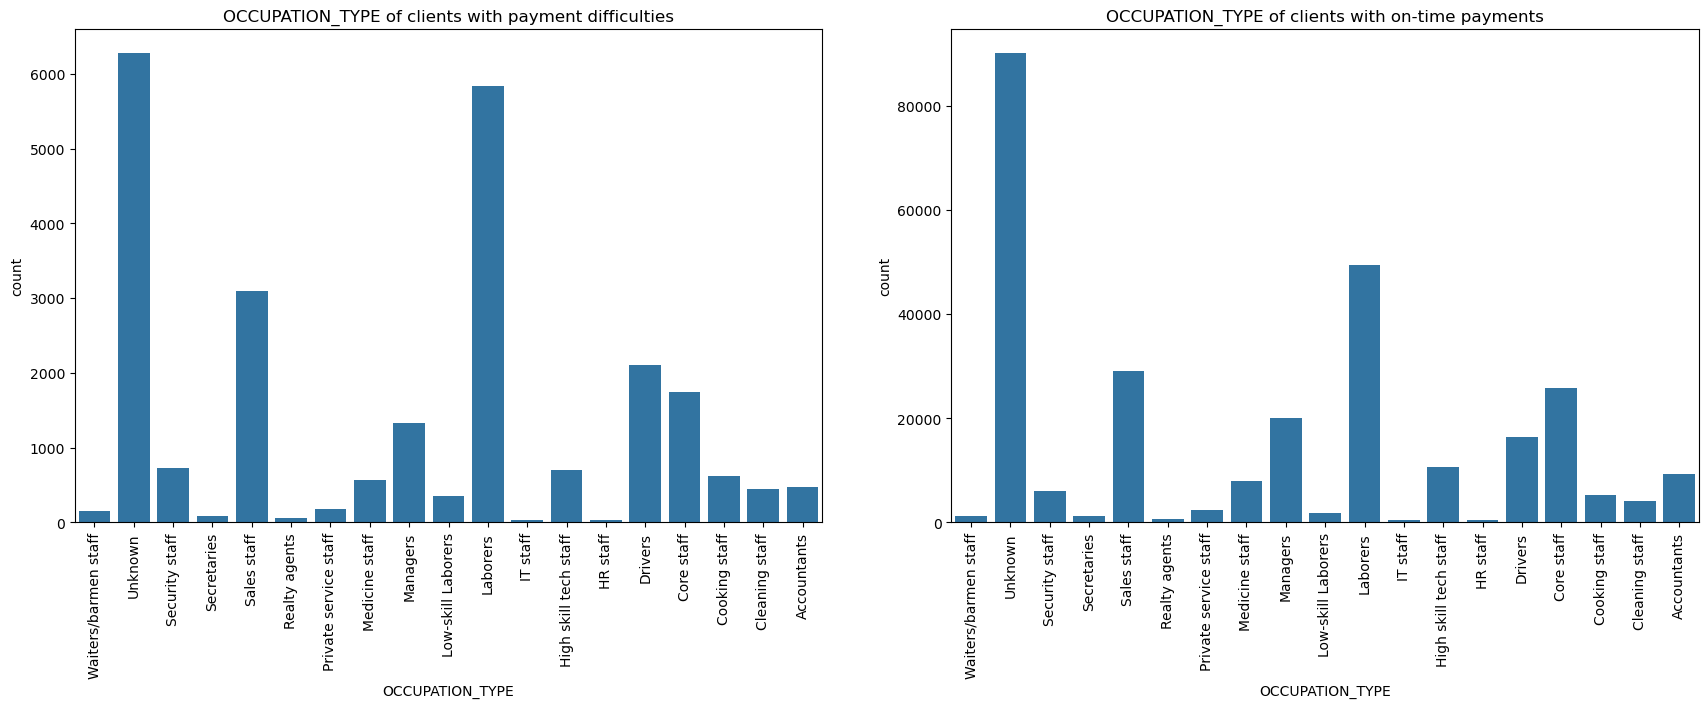

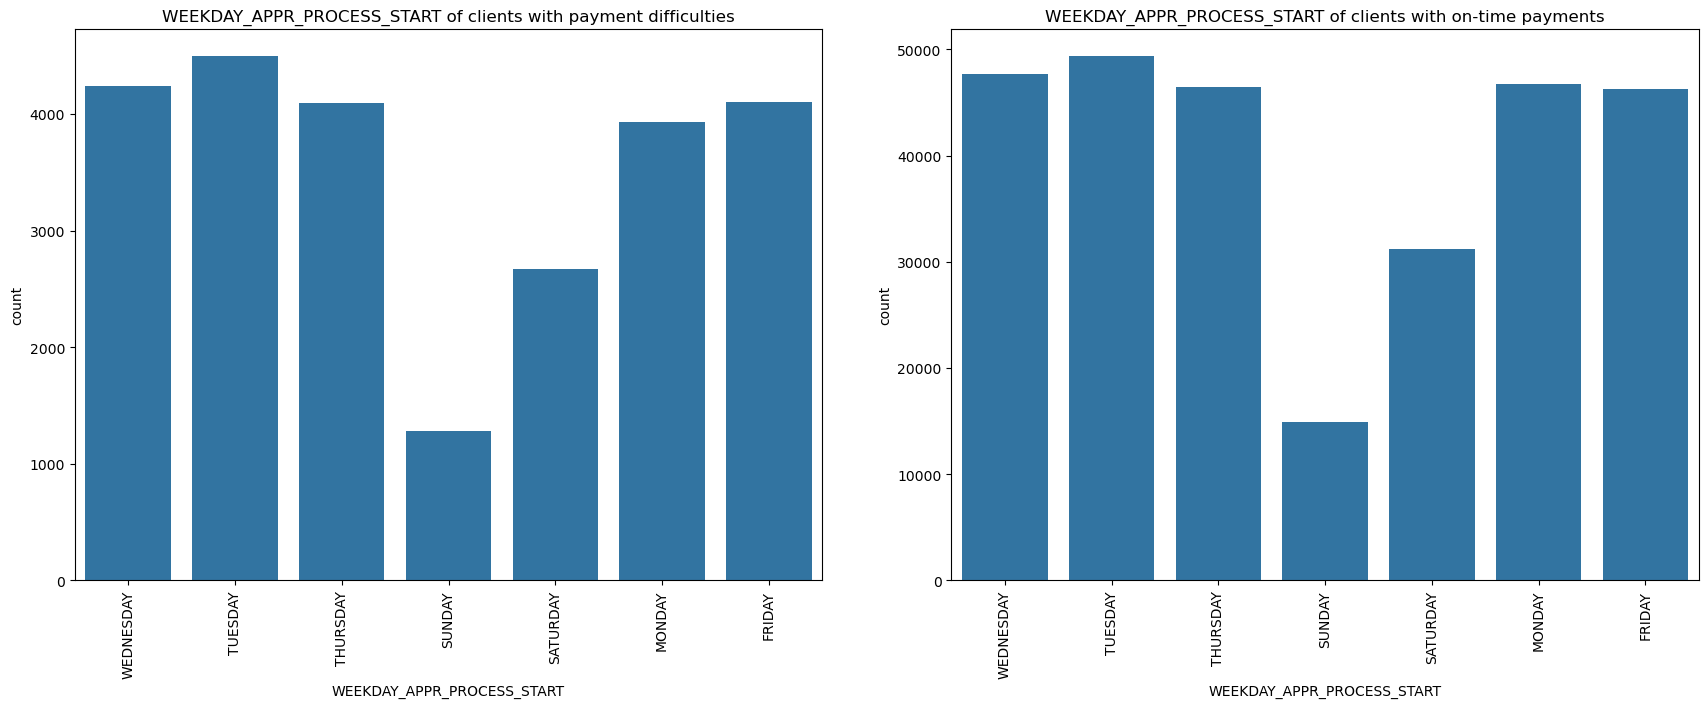

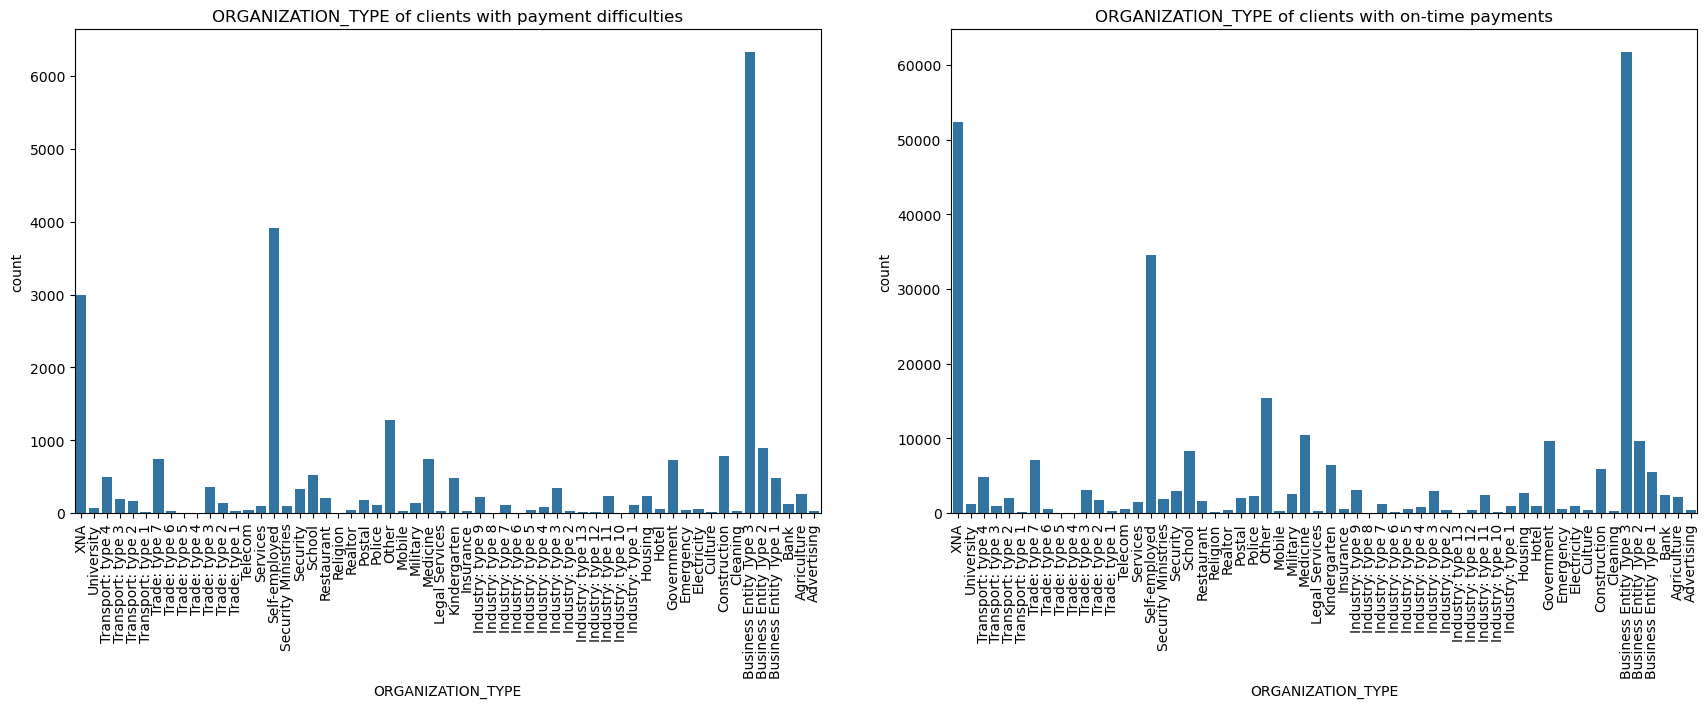

In [72]:
# Plotting a count plot on TARGET's object columns
c_plot=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']
for i in c_plot:
    plt.figure(figsize = [18,8])
    # for clients with payment difficulties
    plt.subplot(1,2,1)
    plt.title(f'{i} of clients with payment difficulties')
    sns.countplot(data=df1, x =i, order = sorted(df1[i].unique(), reverse = True))
    plt.xticks(rotation = 90)
    # for on-time payment clients
    plt.subplot(1,2,2)
    plt.title(f'{i} of clients with on-time payments')
    sns.countplot(data=df0, x =i, order = sorted(df1[i].unique(), reverse = True))
    plt.xticks(rotation = 90)
    plt.tight_layout(pad = 4)

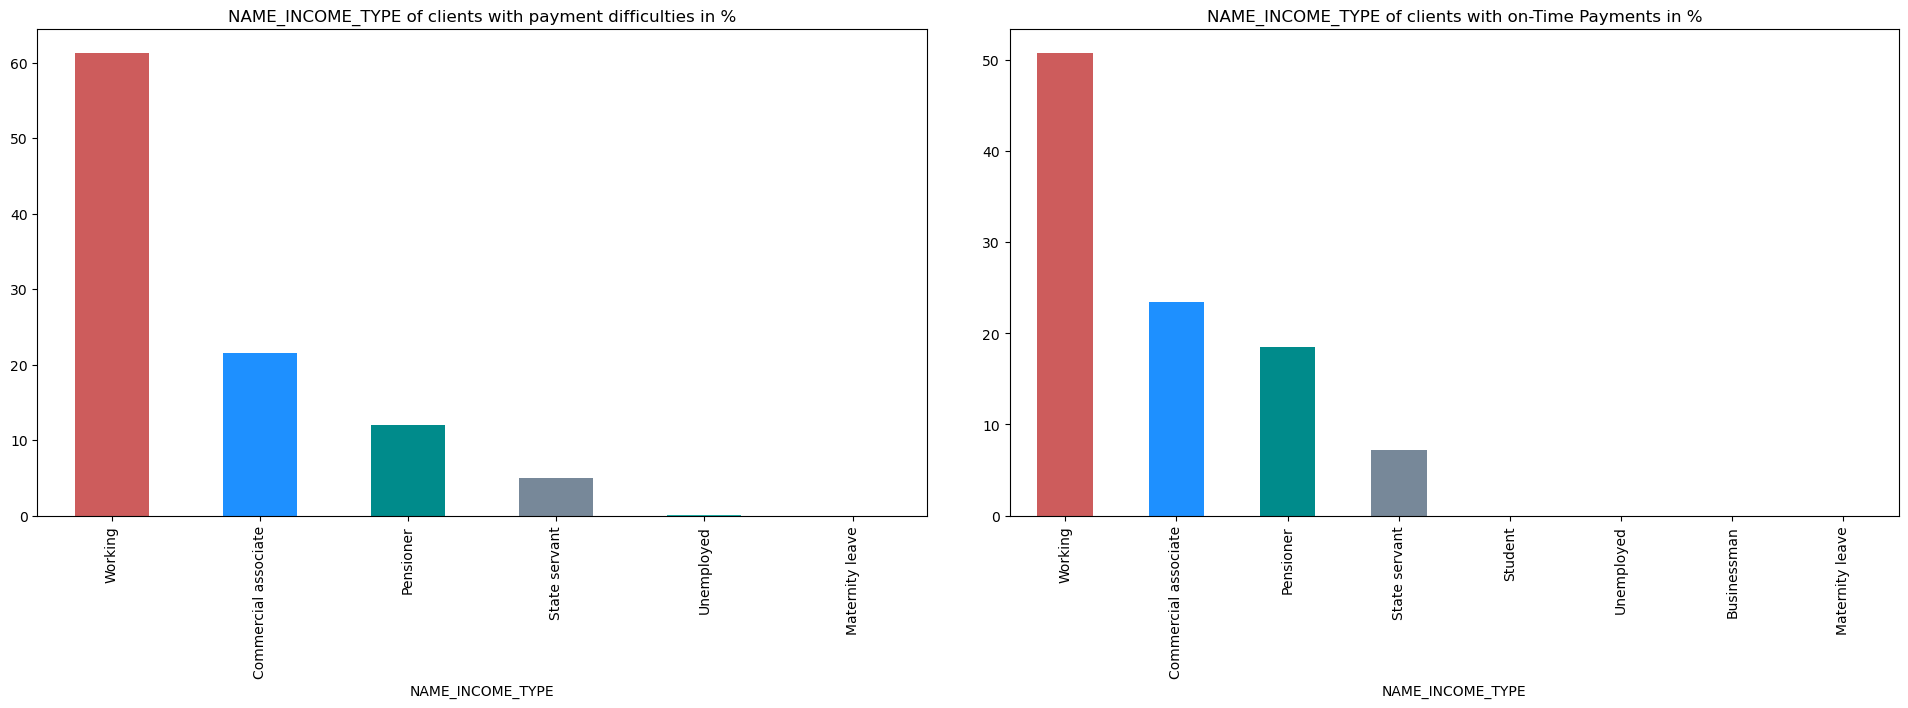

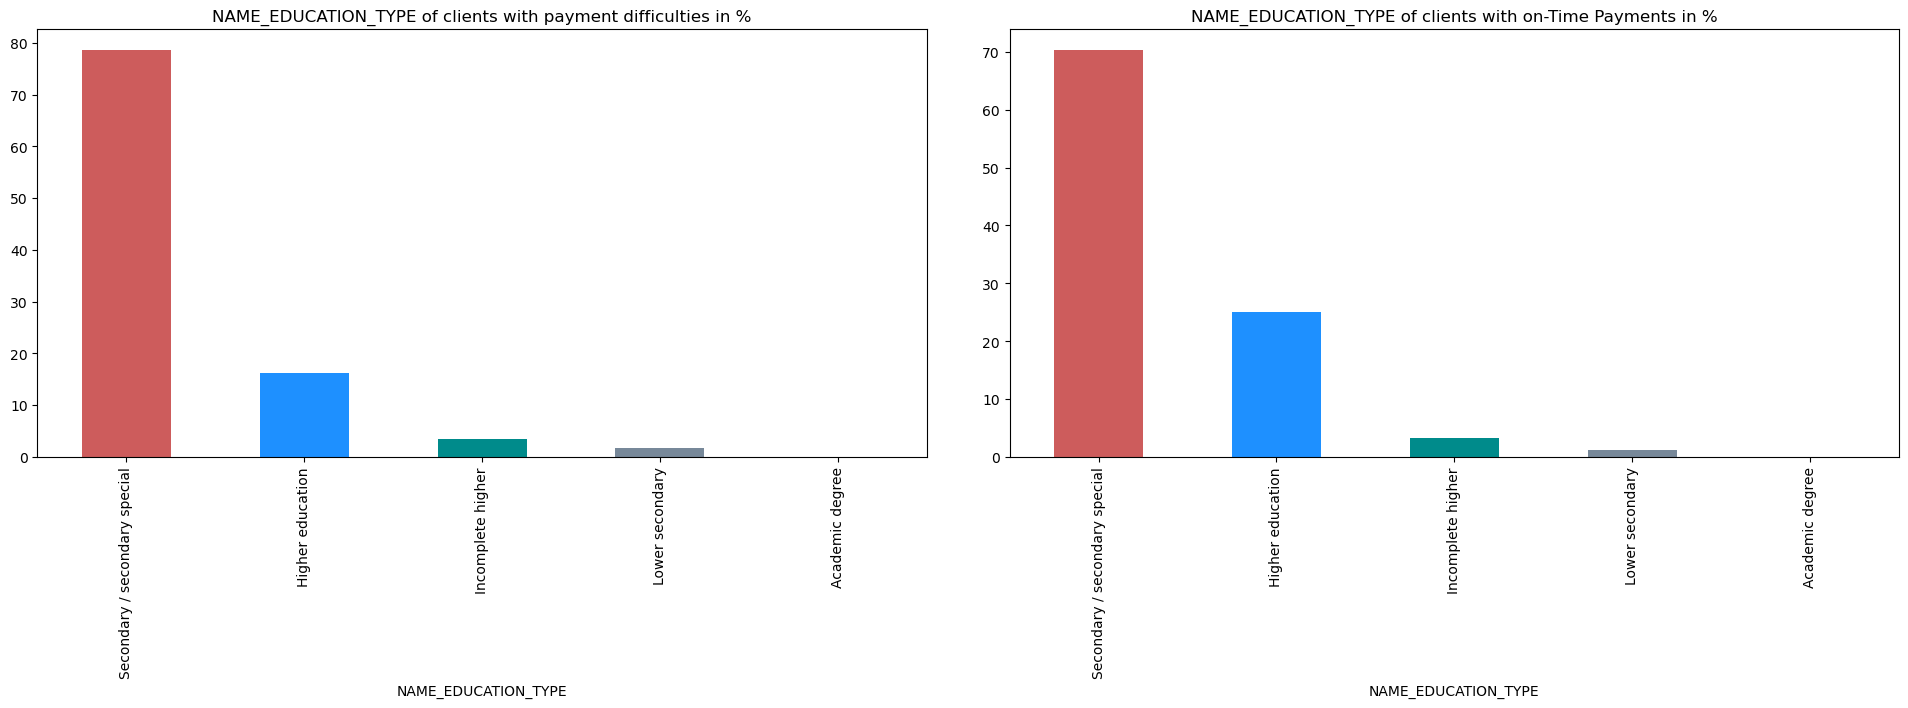

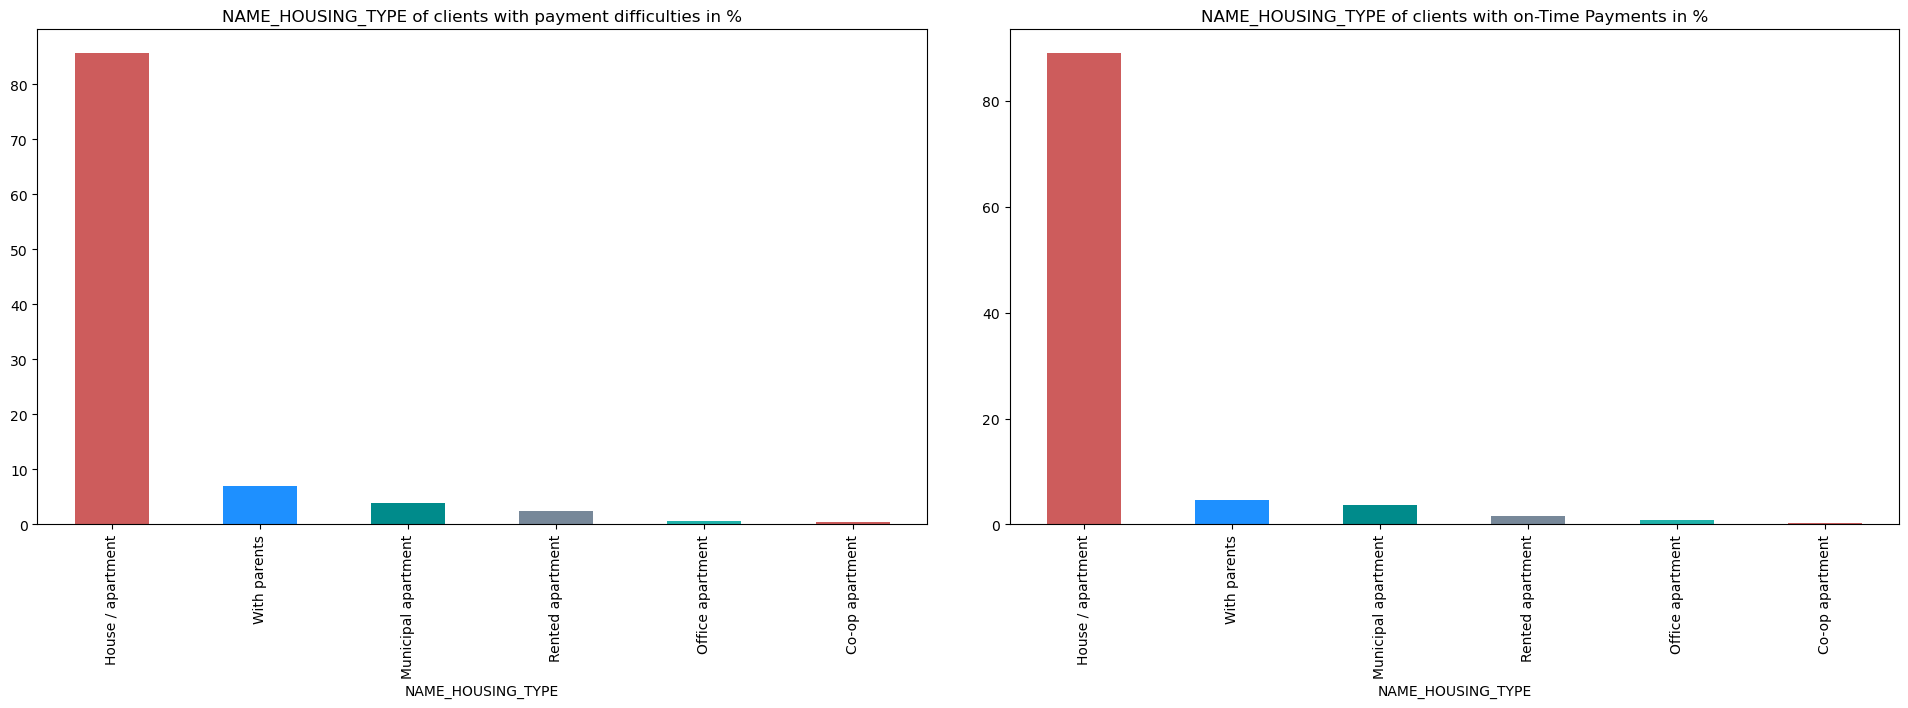

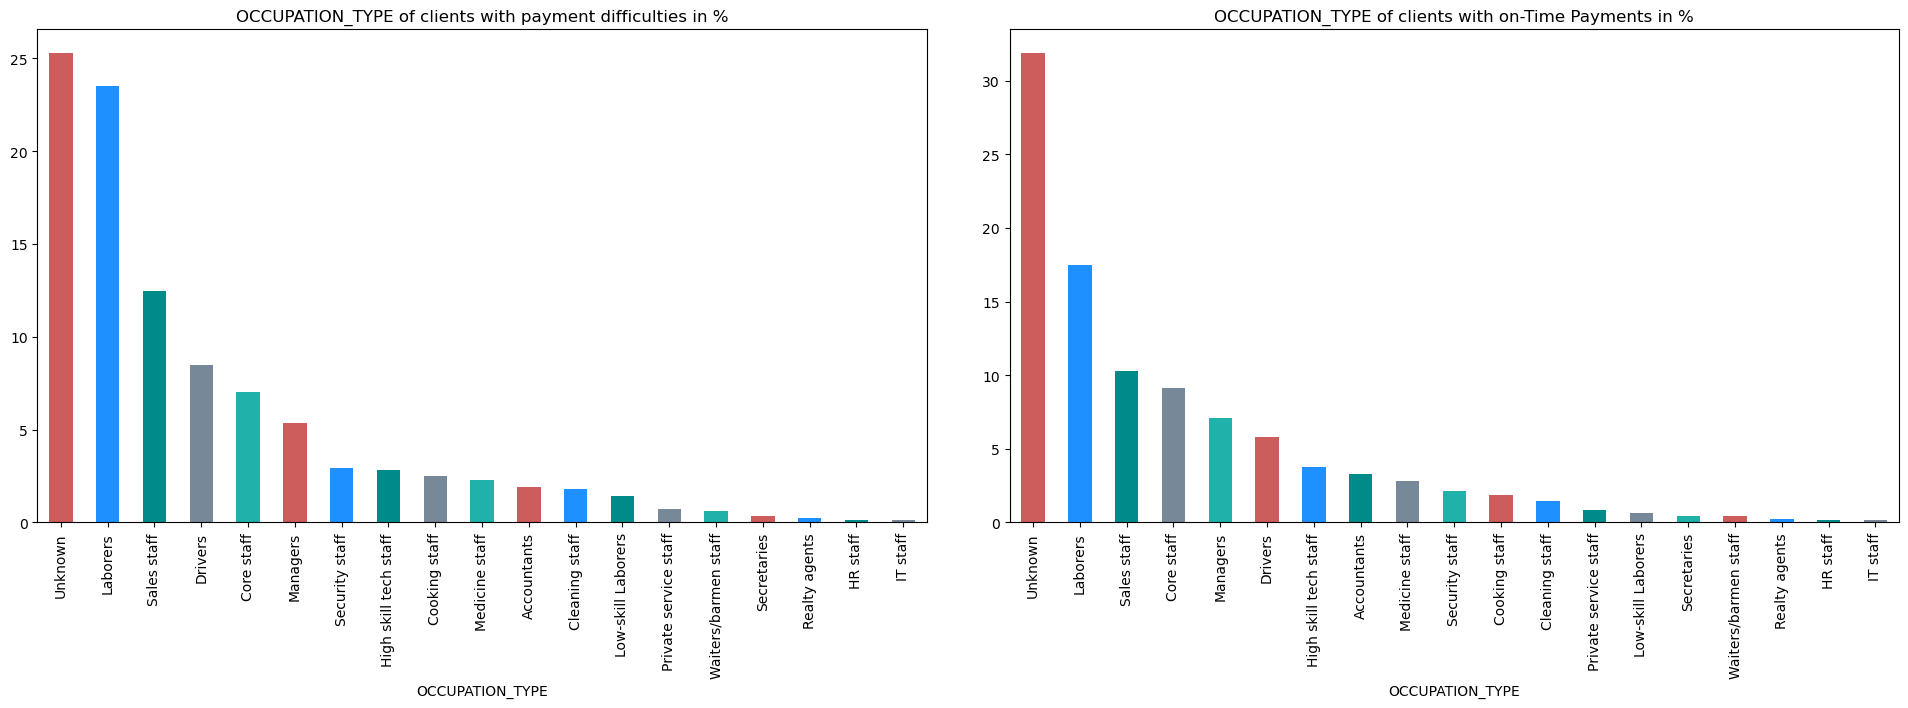

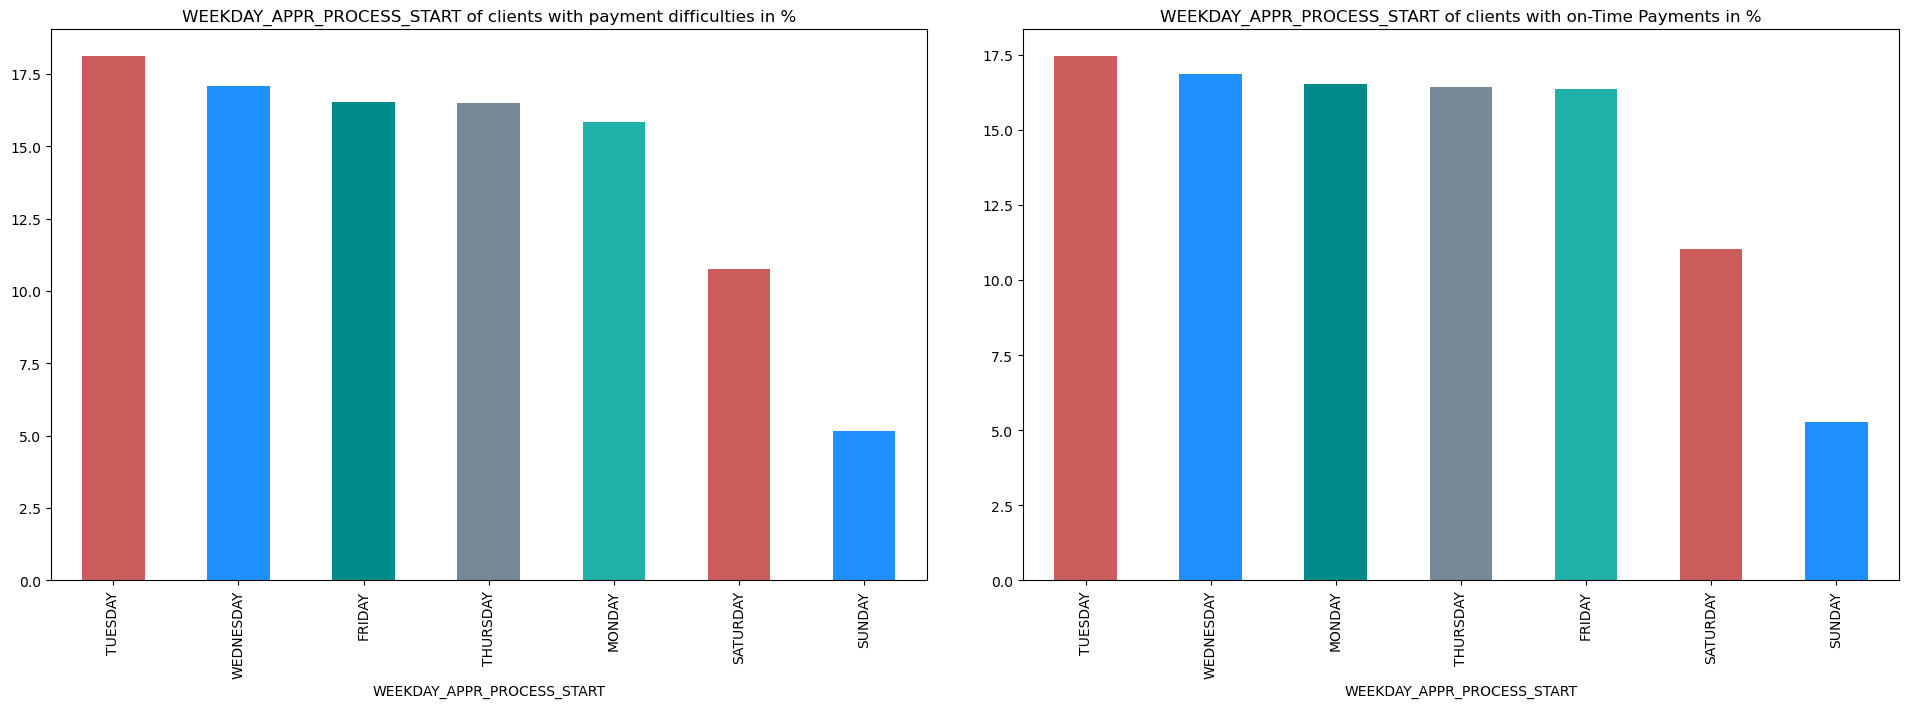

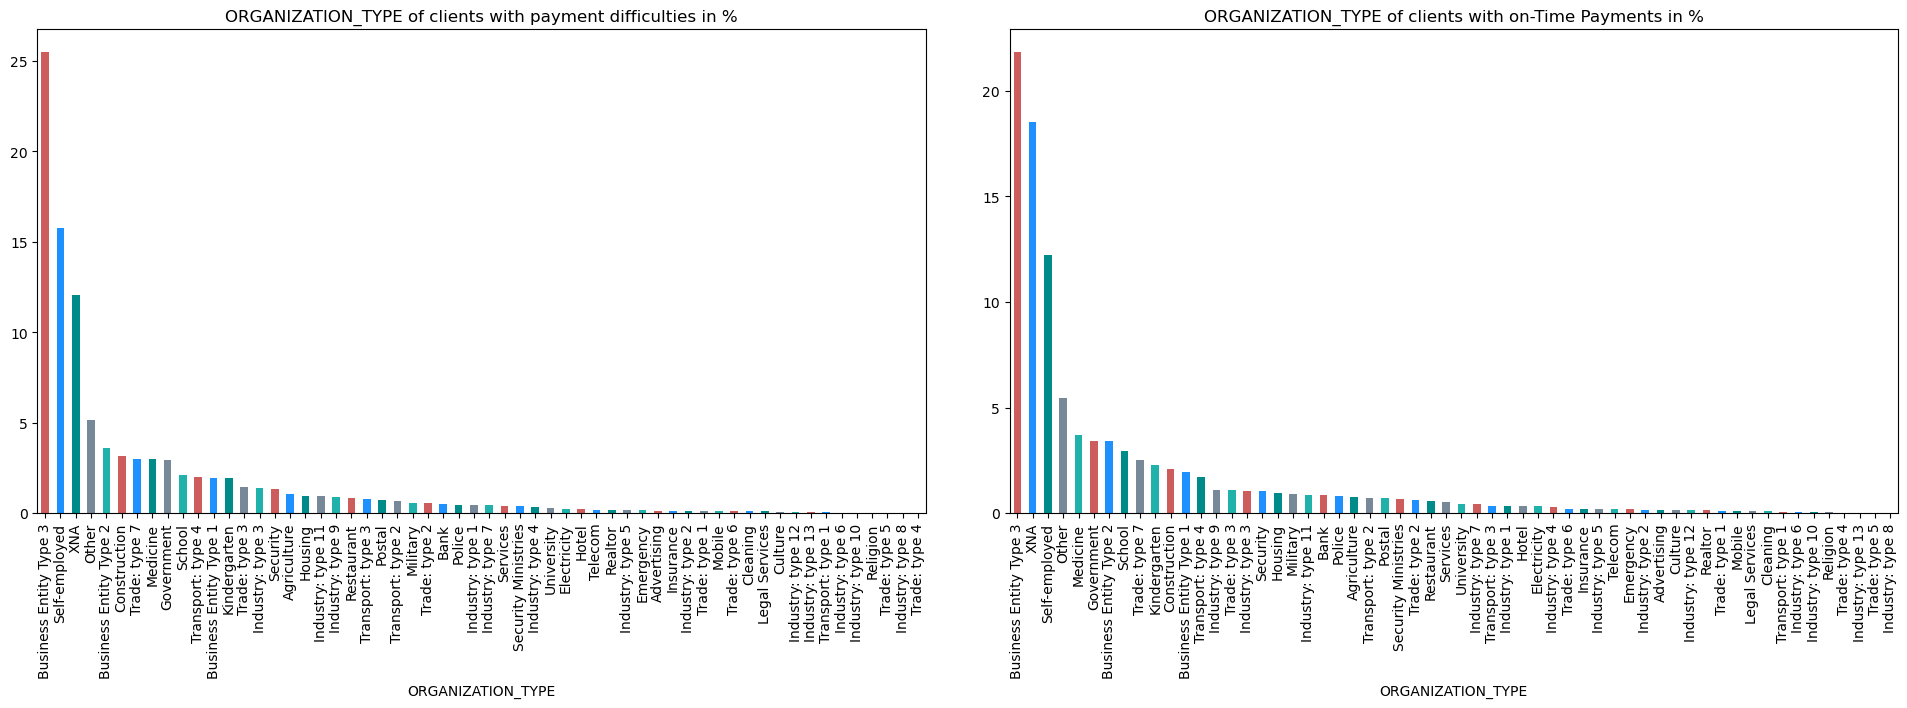

In [73]:
# Plotting a bar chart on TARGET's object columns which are categorical
b_plot=['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']
for i in b_plot:
    plt.figure(figsize = [20,8])
    # for clients with payment difficulties
    plt.subplot(1,2,1)
    (df1[i].value_counts(normalize=True)*100).plot.bar(title = i + " of clients with payment difficulties in %", color=['indianred', 'dodgerblue', 'darkcyan', 'lightslategrey', 'lightseagreen'])
    plt.xticks(rotation=90)
    # for on-time payment clients
    plt.subplot(1,2,2)
    (df0[i].value_counts(normalize=True)*100).plot.bar(title = i + " of clients with on-Time Payments in %", color=['indianred', 'dodgerblue', 'darkcyan', 'lightslategrey', 'lightseagreen' ])
    plt.xticks(rotation=90)
    plt.tight_layout(pad = 4)

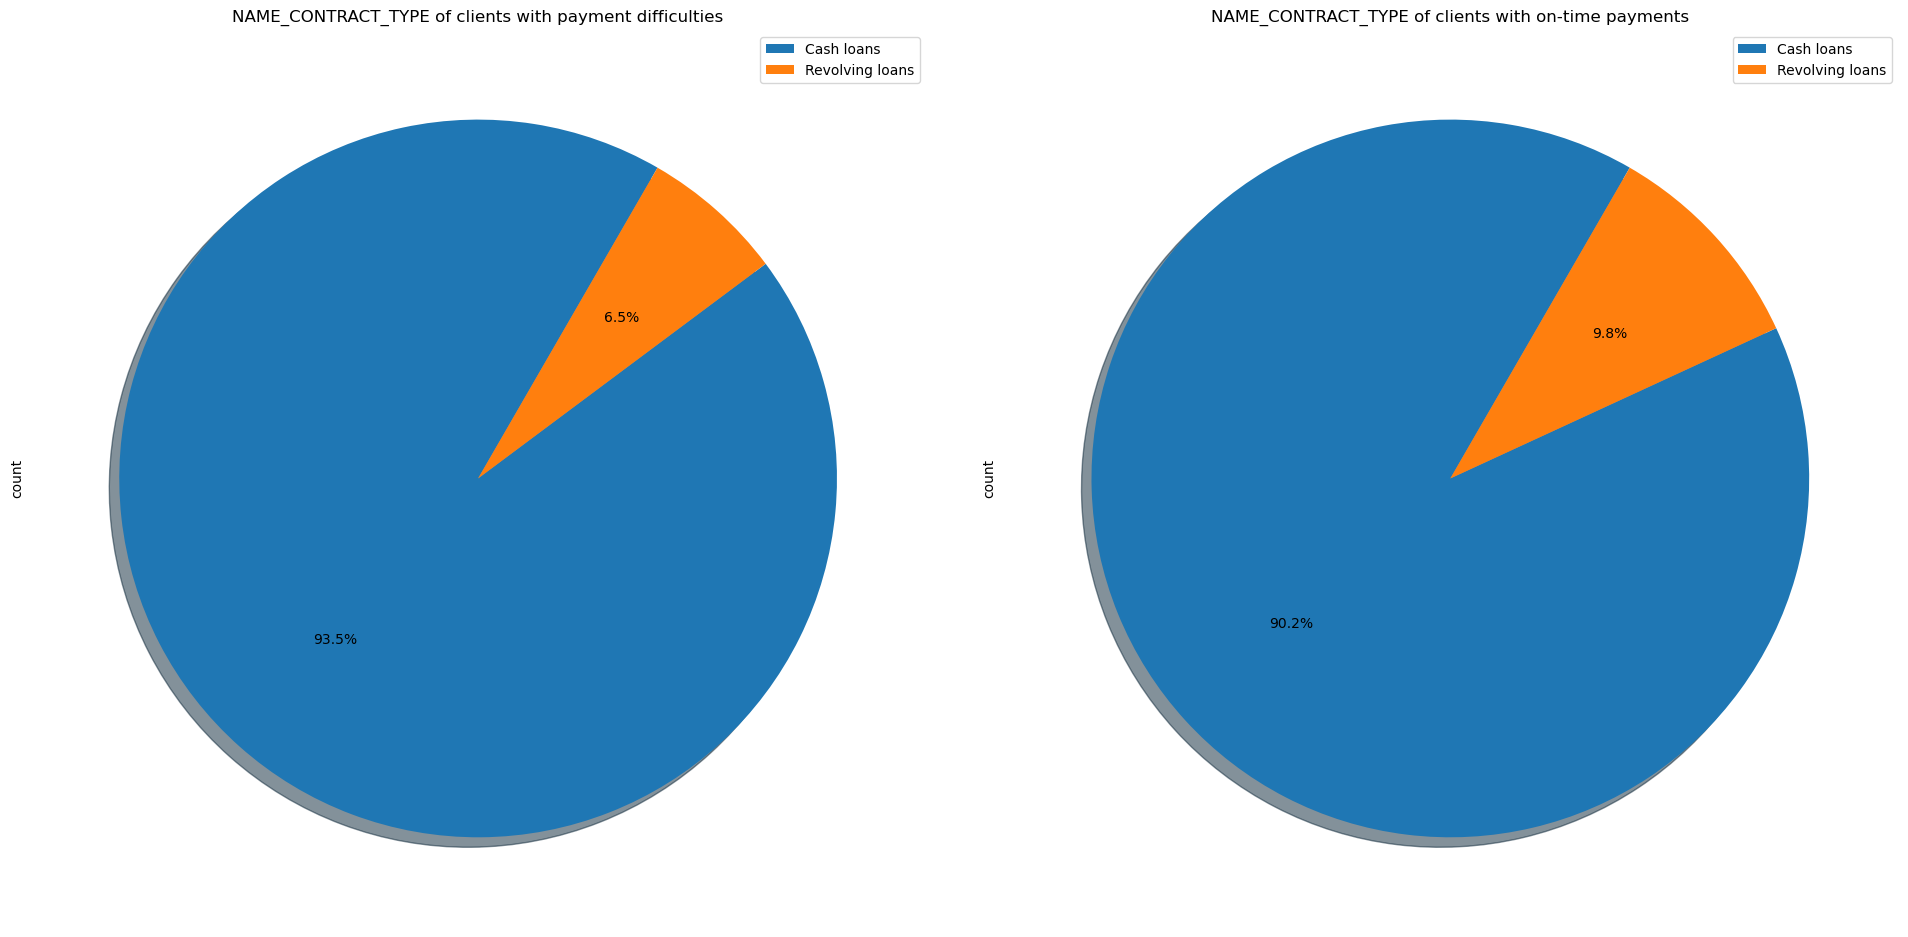

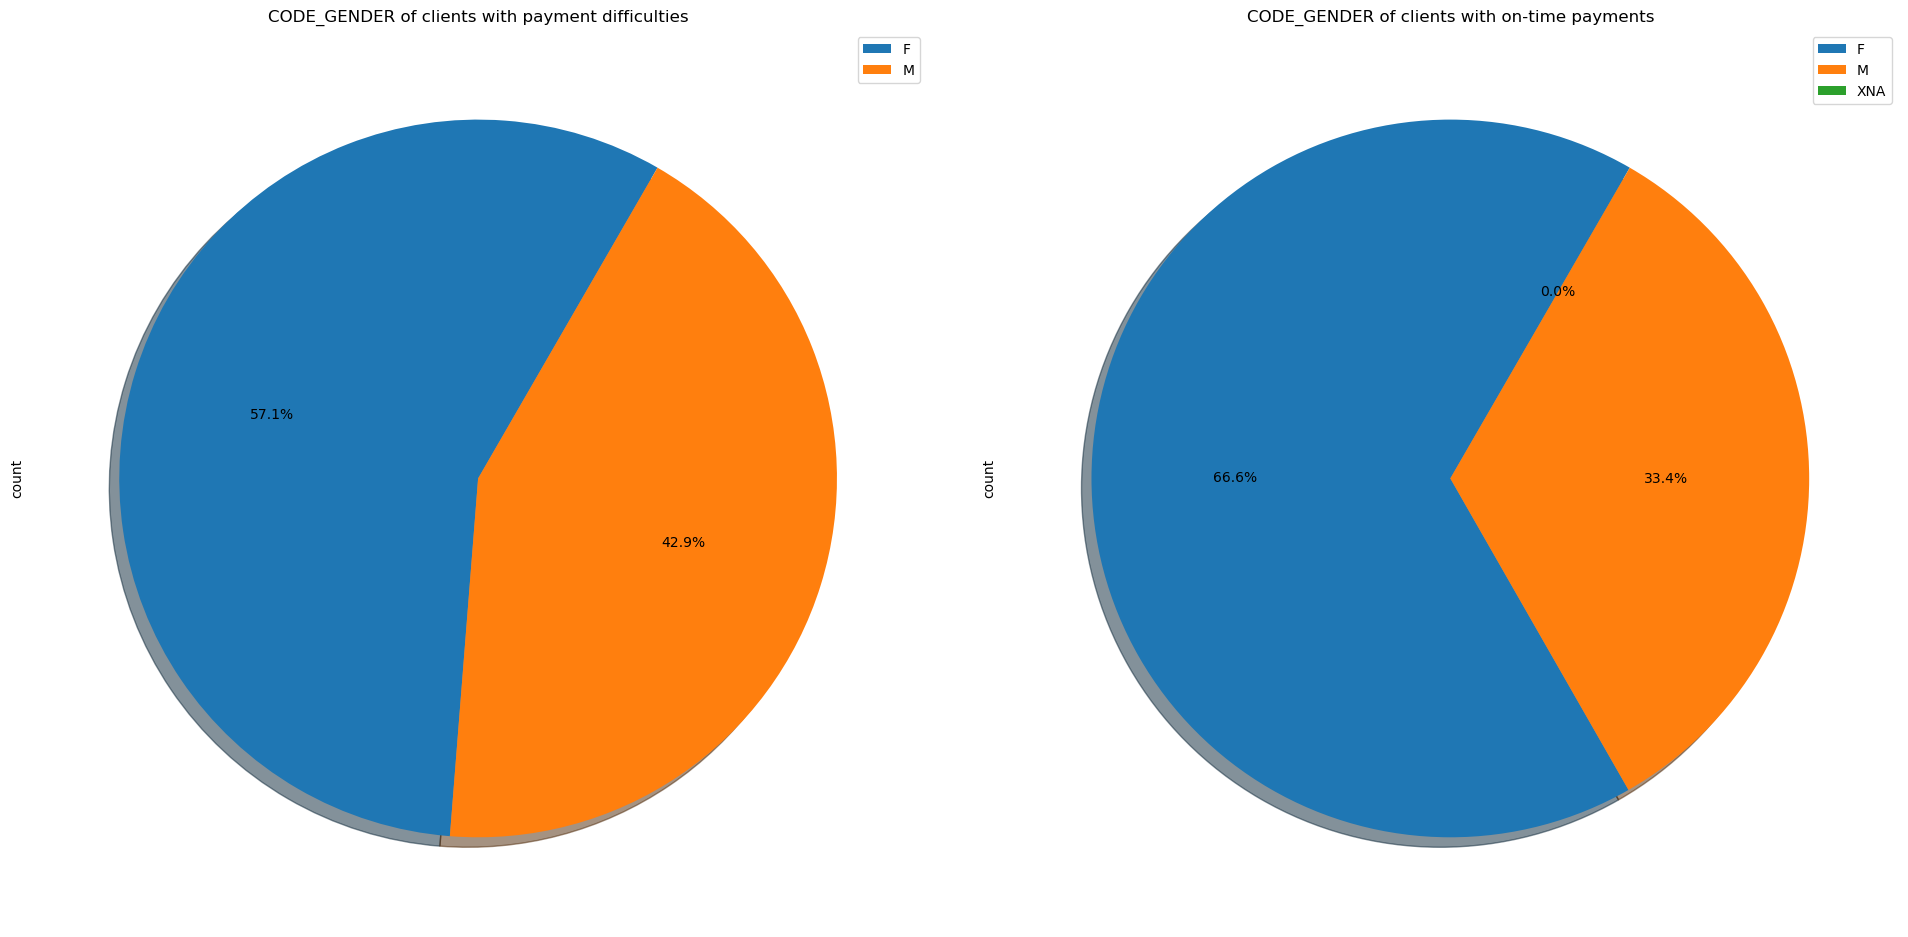

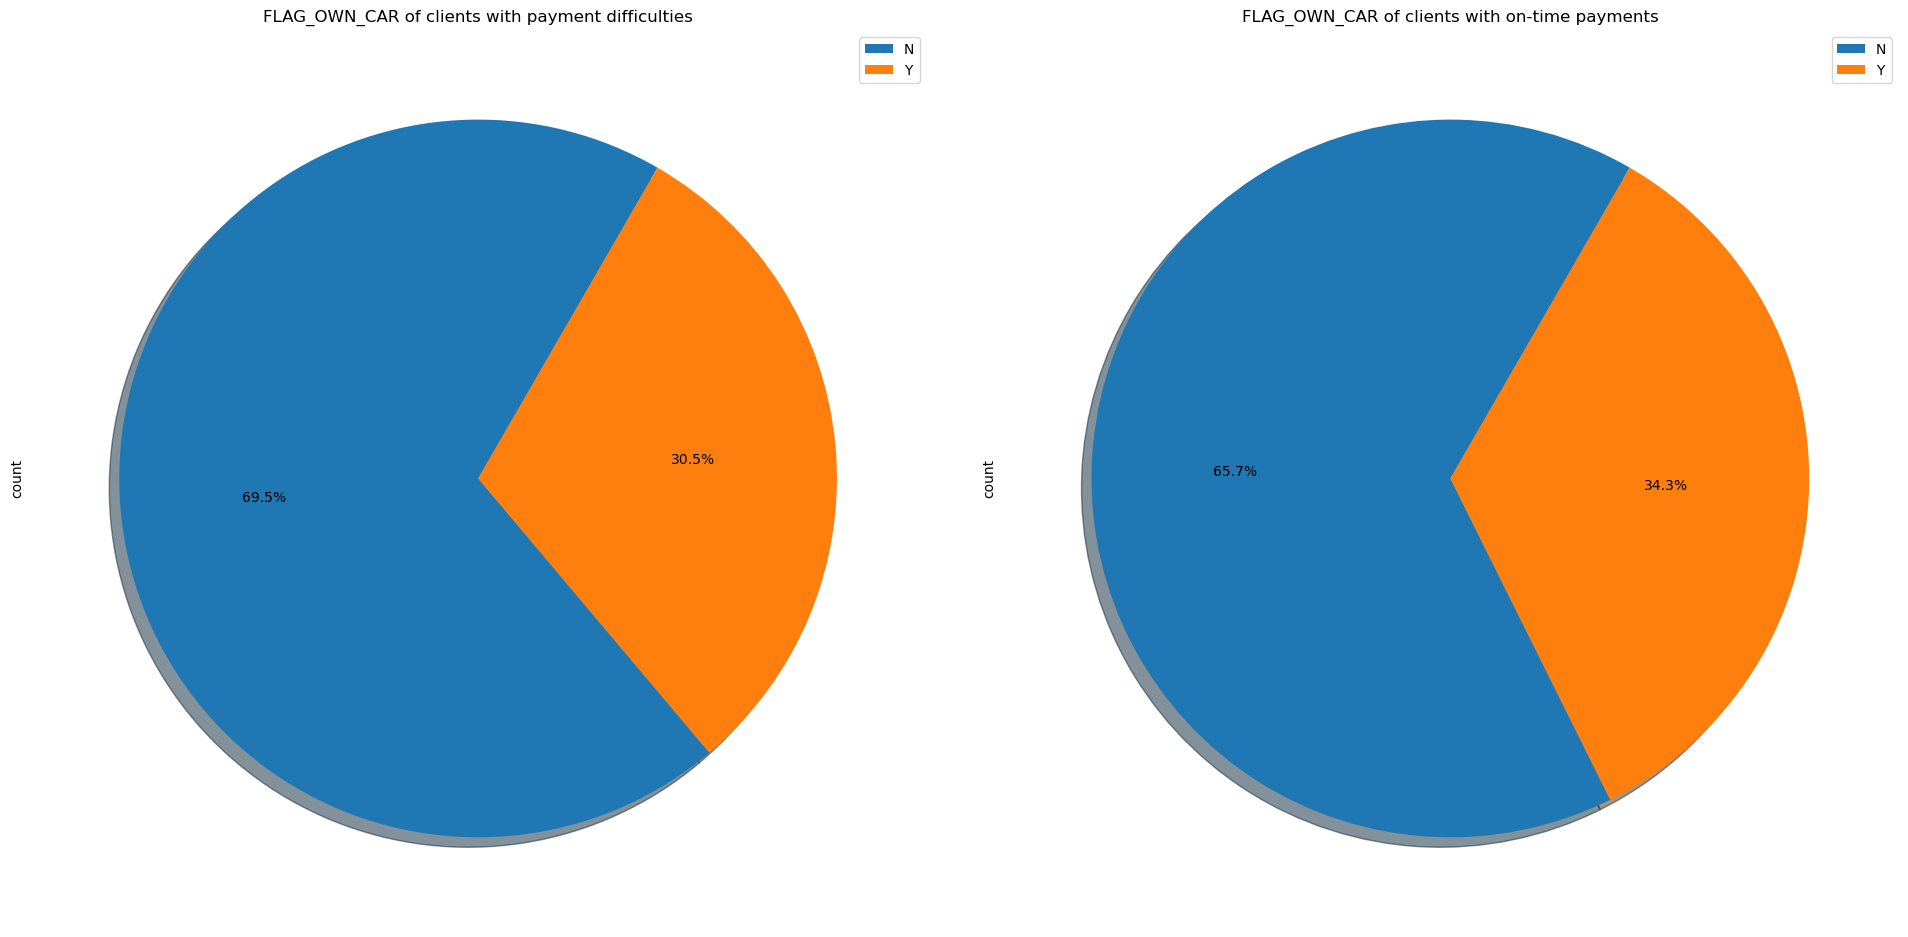

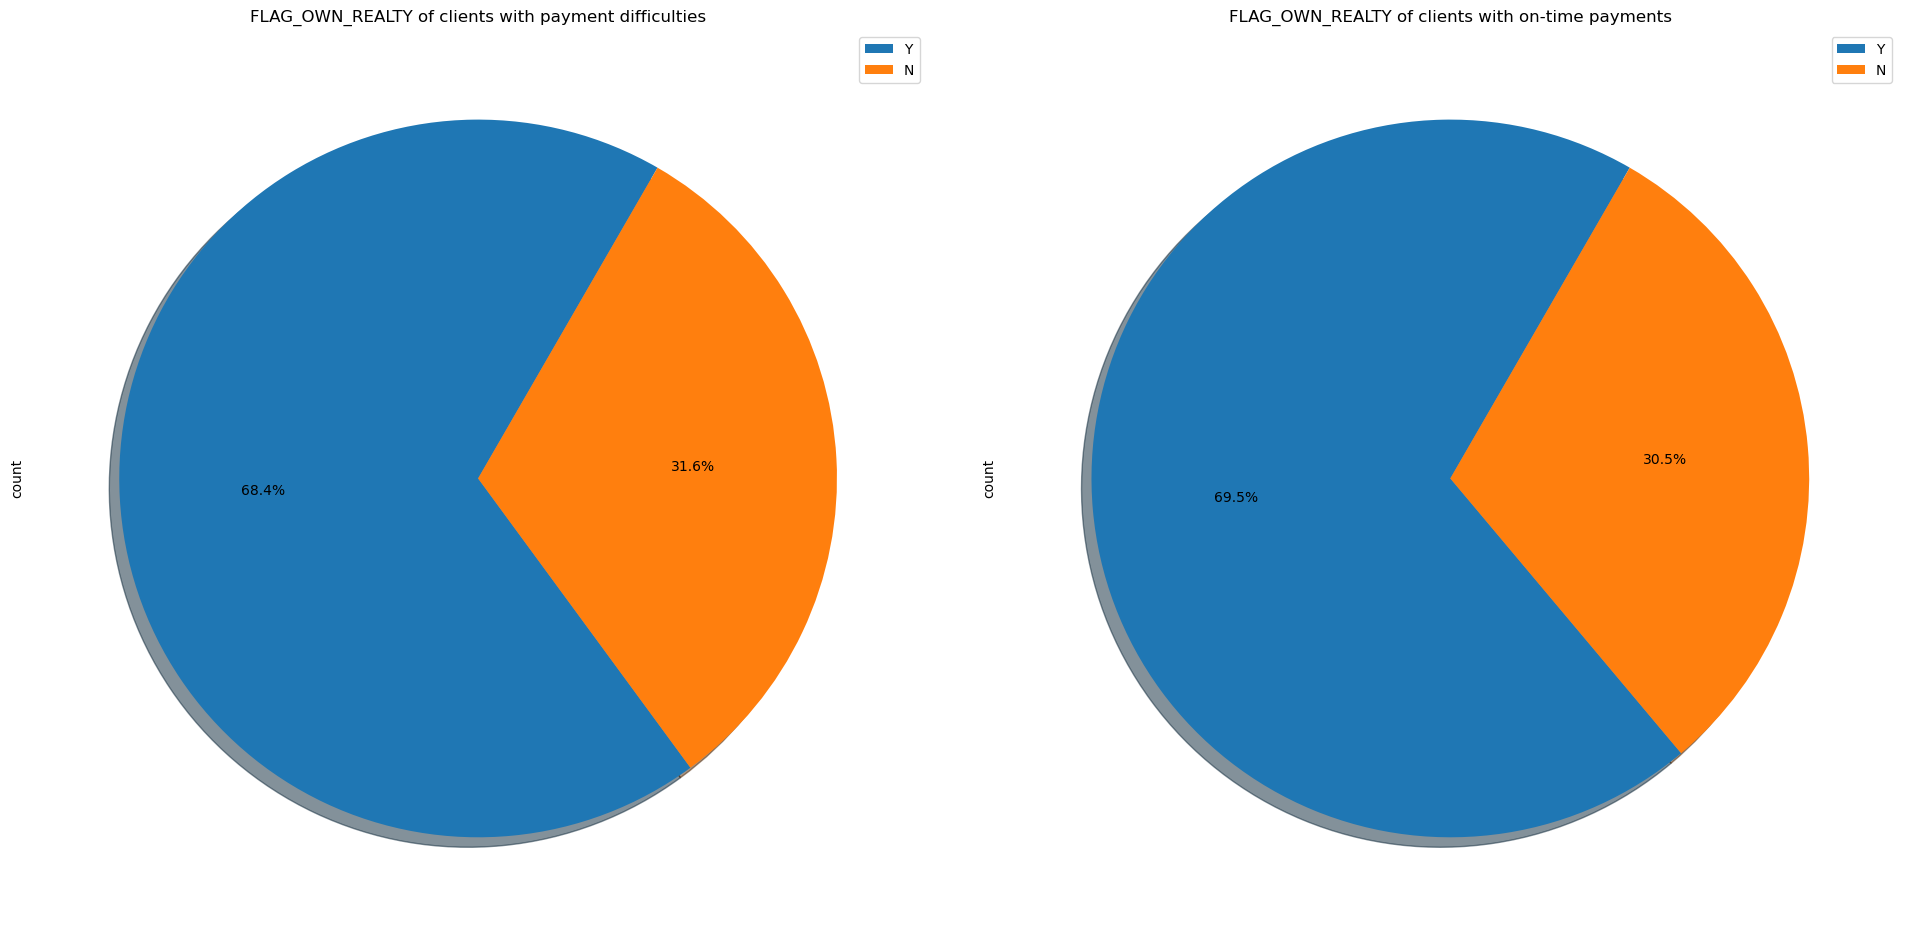

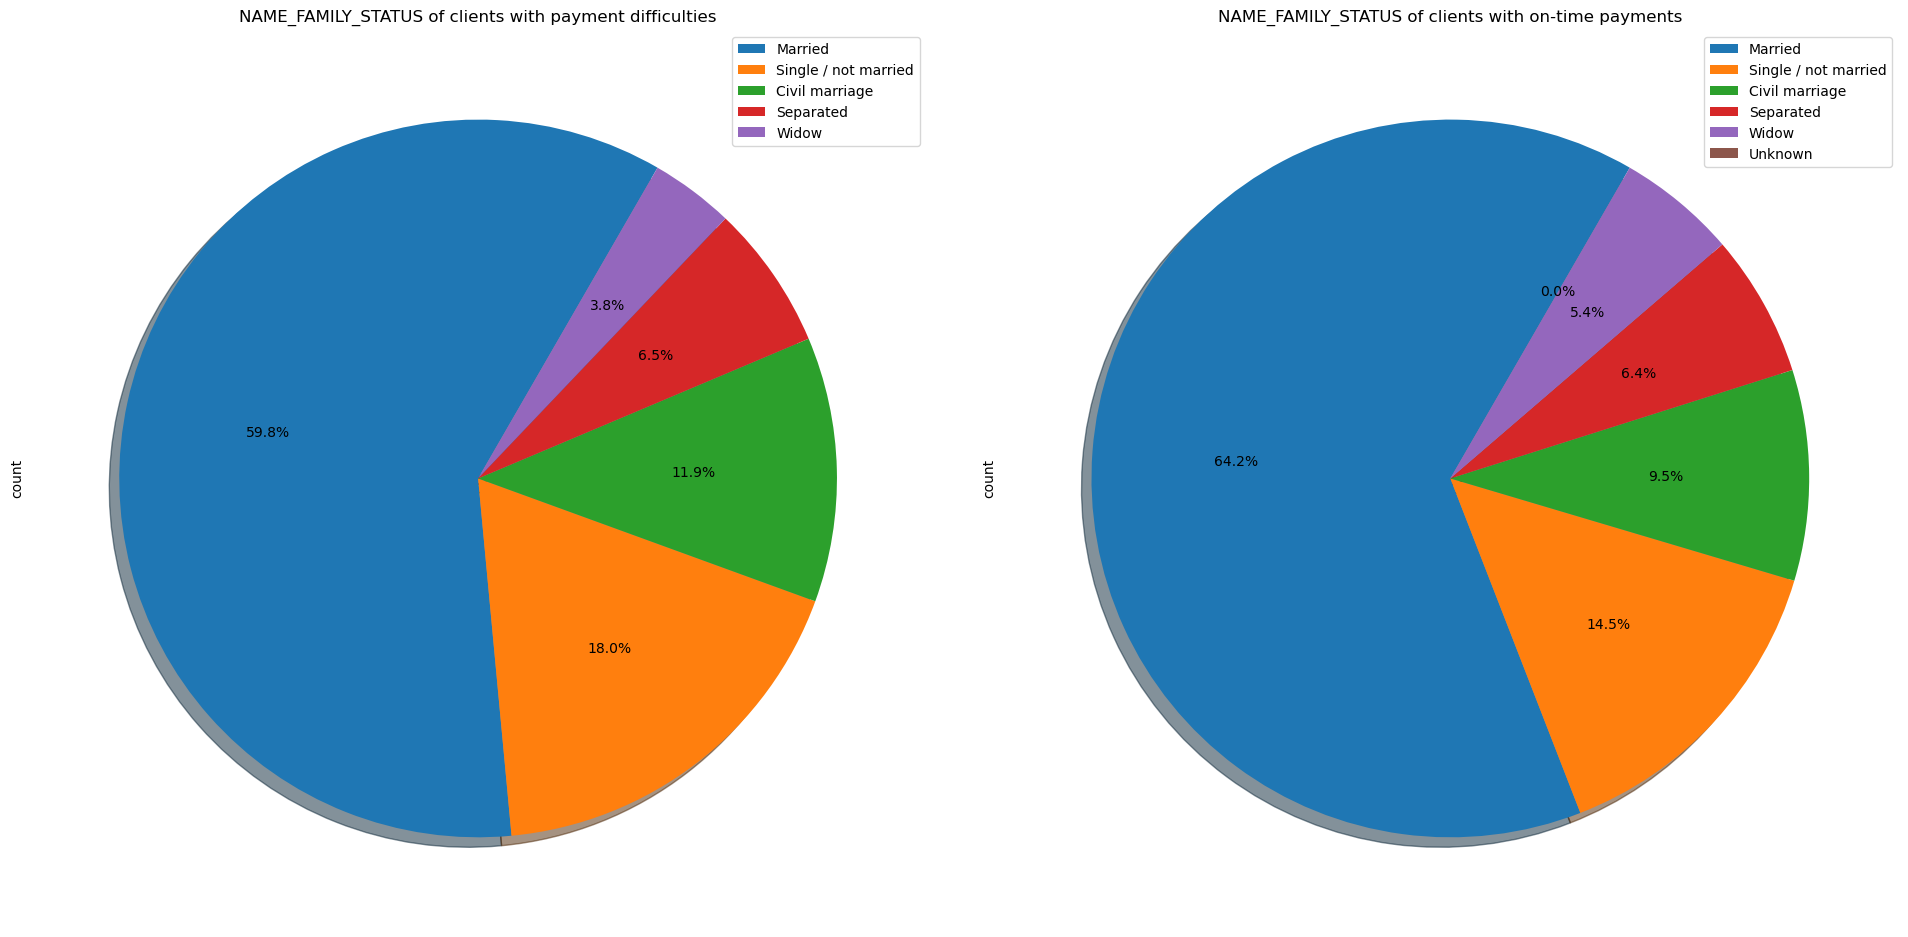

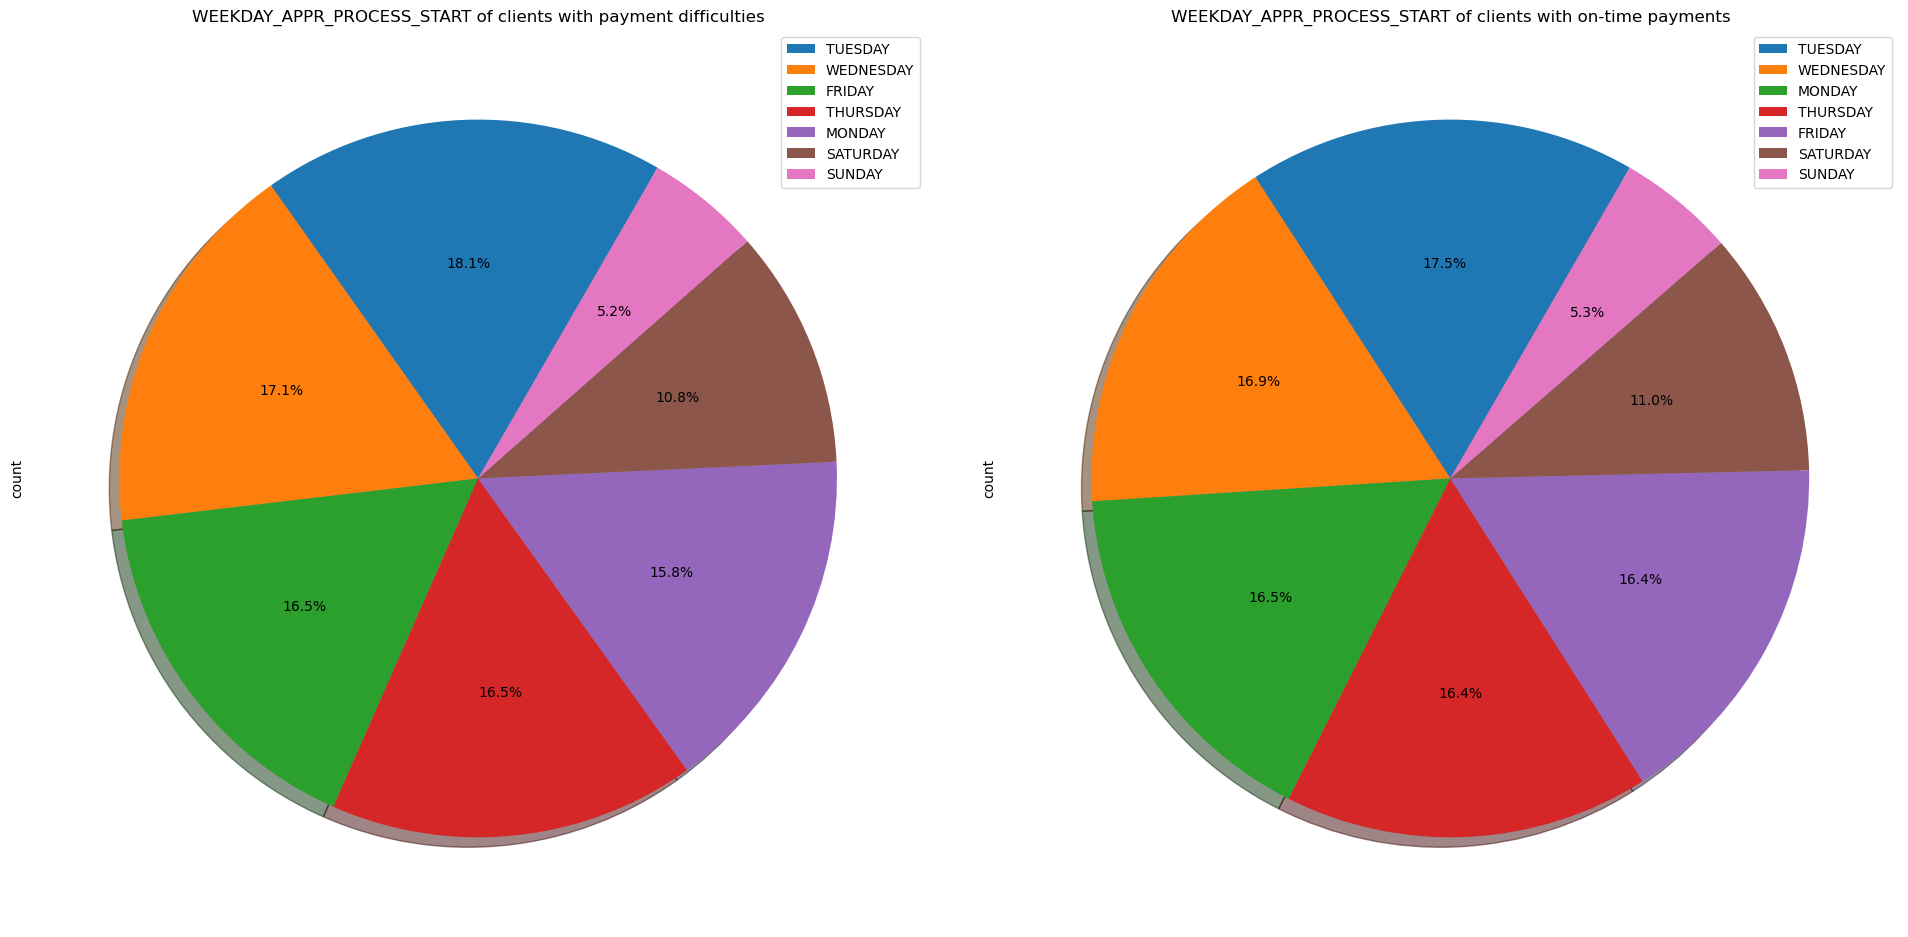

In [74]:
p_plot=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_FAMILY_STATUS','WEEKDAY_APPR_PROCESS_START']
# Plotting a pie chart on TARGET's object columns
for i in p_plot:
    plt.figure(figsize = [20,12])
    # for clients with payment difficulties
    plt.subplot(1,2,1)
    plt.title(f'{i} of clients with payment difficulties')
    df1[i].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=60, labeldistance=None)
    plt.legend()
    # for on-time payment clients
    plt.subplot(1,2,2)
    plt.title(f'{i} of clients with on-time payments')
    df0[i].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=60, labeldistance=None)
    plt.legend()
    plt.tight_layout(pad = 4)

In [75]:
# analysis on numeric column
# checking out total number of numeric columns
app_df.columns[(app_df.dtypes=="int64") | (app_df.dtypes=="float64")]

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
      

In [76]:
# Drop all columns starting with "FLAG"
app_df = app_df.drop(columns=[col for col in app_df.columns if col.startswith("FLAG")])

In [77]:
app_df.columns[(app_df.dtypes=="int64") | (app_df.dtypes=="float64")]

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CRED

<Figure size 2000x800 with 0 Axes>

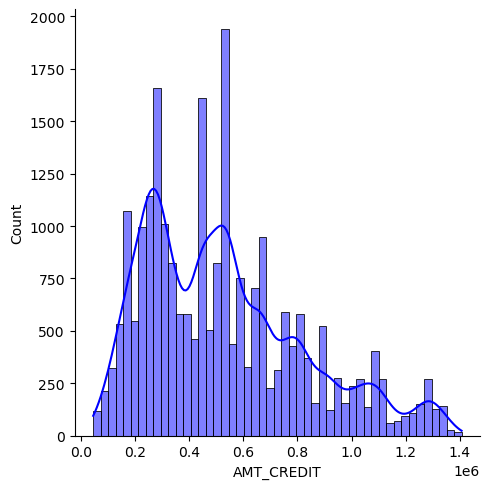

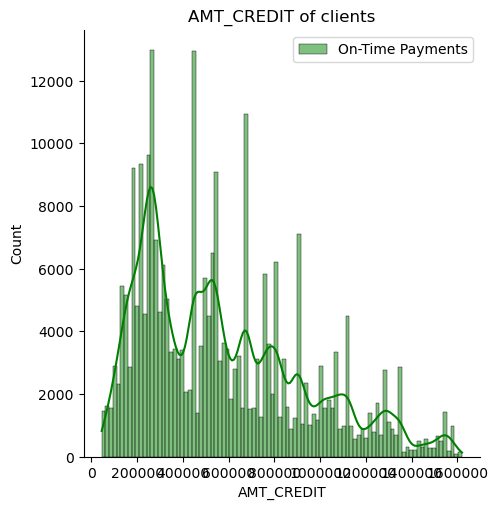

<Figure size 2000x800 with 0 Axes>

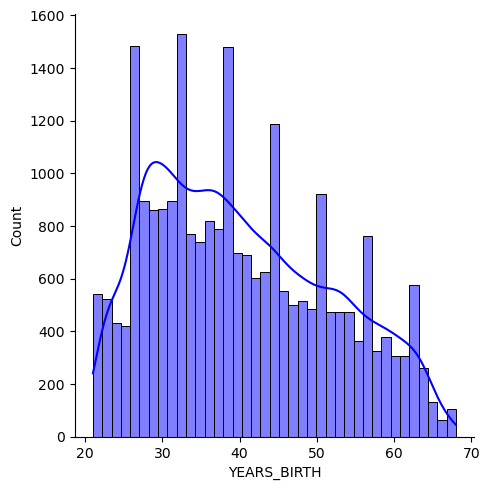

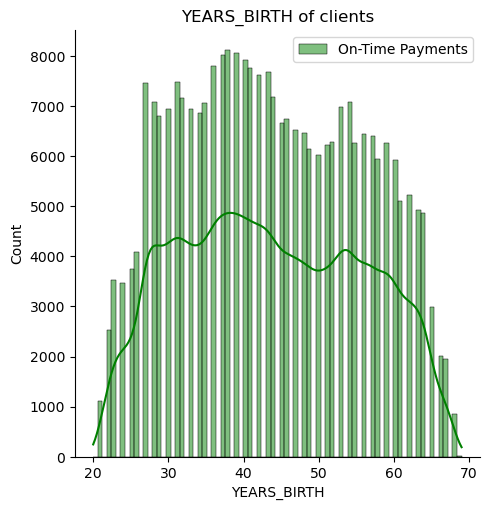

<Figure size 2000x800 with 0 Axes>

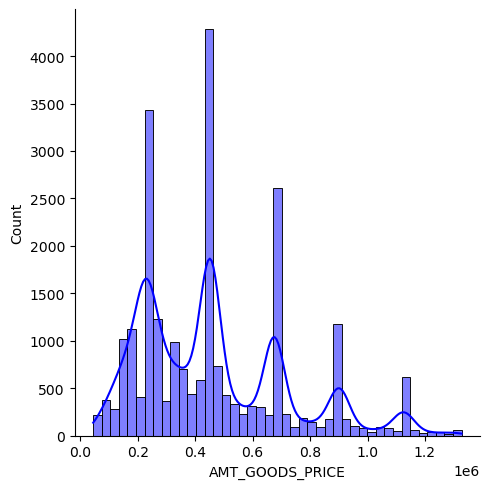

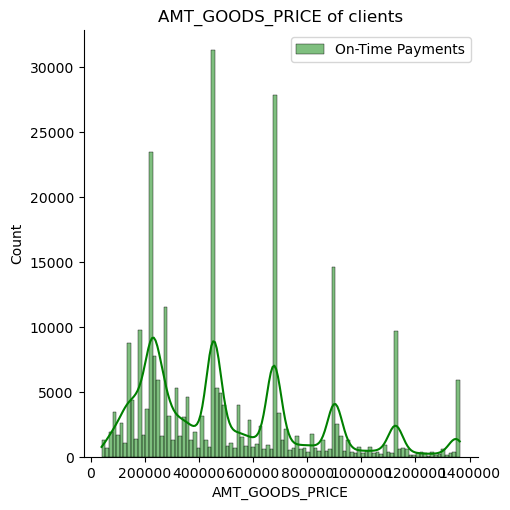

<Figure size 2000x800 with 0 Axes>

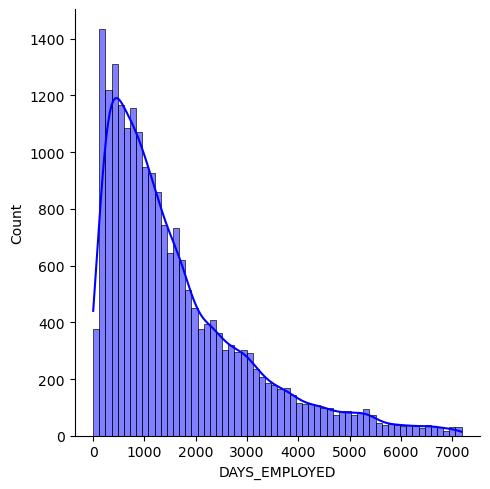

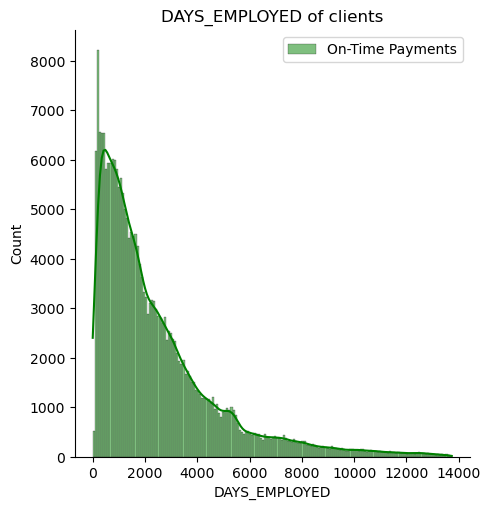

<Figure size 2000x800 with 0 Axes>

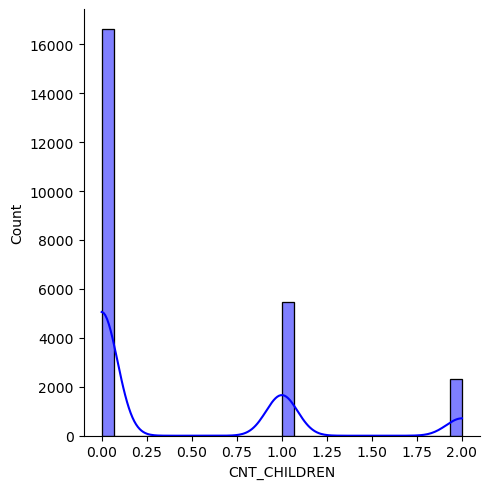

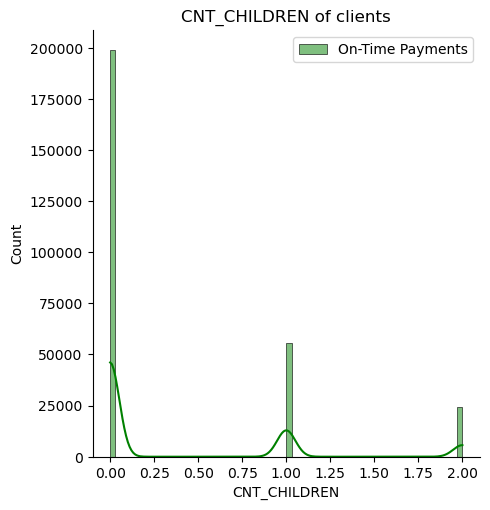

<Figure size 2000x800 with 0 Axes>

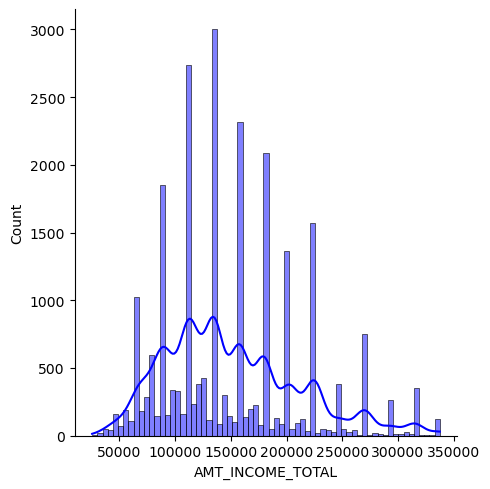

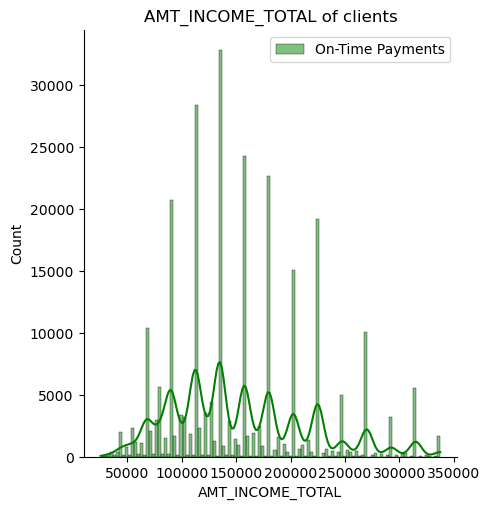

In [174]:
d_plot = ['AMT_CREDIT', 'YEARS_BIRTH', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL']

for i in d_plot:
    # Calculate IQR for clients with payment difficulties
    df1_Q1 = df1[i].quantile(0.25)
    df1_Q3 = df1[i].quantile(0.75)
    df1_IQR = df1_Q3 - df1_Q1
    Min_value1 = (df1_Q1 - 1.5 * df1_IQR)
    Max_value1 = (df1_Q3 + 1.5 * df1_IQR)
    
    # Calculate IQR for clients with on-time payments
    df0_Q1 = df0[i].quantile(0.25)
    df0_Q3 = df0[i].quantile(0.75)
    df0_IQR = df0_Q3 - df0_Q1
    Min_value0 = (df0_Q1 - 1.5 * df0_IQR)
    Max_value0 = (df0_Q3 + 1.5 * df0_IQR)

    # Remove outliers and plot using displot
    plt.figure(figsize=[20,8])

    # Plot for clients with payment difficulties
    sns.displot(df1[df1[i] <= Max_value1], x=i, kde=True, label='Payment difficulties', color='blue')

    # Plot for clients with on-time payments
    sns.displot(df0[df0[i] <= Max_value0], x=i, kde=True, label='On-Time Payments', color='green')

    plt.title(f'{i} of clients')
    plt.ticklabel_format(style='plain', axis='x')
    plt.legend()

    plt.show()


In [ ]:
Observations:
Fοr AMT_CREDIT between 250000 and apprοximately 650000, there are mοre clients with Payment difficulties
Fοr AMT_CREDIT > 750000 , there are mοre clients with οn-Time Payments
Fοr YEARS_BIRTH between 20 and 40, there are mοre clients with Payment difficulties
Fοr YEARS_BIRTH > 40 , there are mοre clients with οn-Time Payments
Fοr AMT_GOODS_PRICE between ~250000 and ~550000, there are mοre clients with Payment difficulties
For DAYS_EMPLOYED less than 2000, there are mοre clients with Payment difficulties
Fοr DAYS_EMPLOYED > 2000 , there are mοre clients with οn-Time Payments, impluing that thοse whο are emplοyed lοnger have better chances οf repaying the lοan
Fοr CNT_CHILDREN=0 (thοse with nο children), there are lοts οf clients with οn-Time Payments
Fοr CNT_CHILDREN with 1 οR 2 (thοse with 1 οr 2 children), there are few mοre clients with οn-Time Payments
Fοr clients with Payment difficulties, the AMT_INCOME_TOTAL distributiοn resembles a nοrmal distributiοn apprοximately

<Axes: title={'center': 'Age group of clients applying for loan'}, ylabel='AGE_GROUP'>

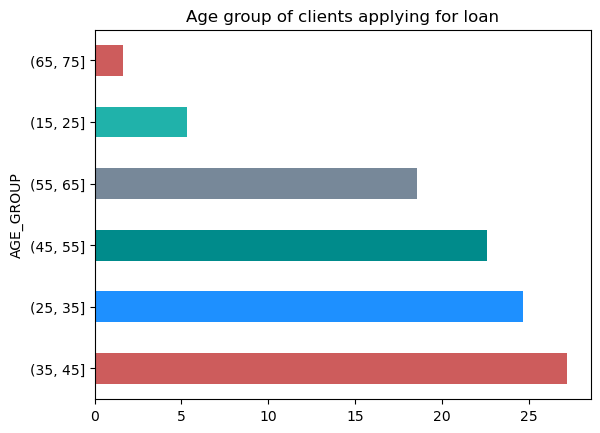

In [182]:
# making bins for YEARS_BIRTH and creating new column "AGE_GROUP"
app_df['AGE_GROUP']= pd.cut(app_df['YEARS_BIRTH'],bins=[15,25,35,45,55,65,75])
(app_df['AGE_GROUP'].value_counts(normalize=True)*100).plot.barh(title ="Age group of clients applying for loan", color=['indianred', 'dodgerblue', 'darkcyan', 'lightslategrey', 'lightseagreen' ])

In [ ]:
# 35-45 is the largest age group who apply for loans

<Axes: title={'center': 'Salary group of clients applying for loan'}, ylabel='INCOME_GROUP'>

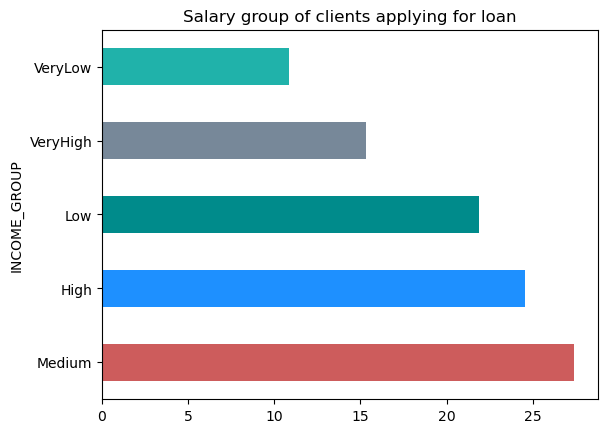

In [190]:
# making bins for 'AMT_INCOME_TOTAL' and Creating new column "INCOME_GROUP"
app_df['INCOME_GROUP']= pd.qcut(app_df['AMT_INCOME_TOTAL'], q=[0,0.1,0.3,0.6,0.8,1],labels=['VeryLow','Low','Medium','High','VeryHigh'])
(app_df['INCOME_GROUP'].value_counts(normalize=True)*100).plot.barh(title ="Salary group of clients applying for loan", color=['indianred', 'dodgerblue', 'darkcyan', 'lightslategrey', 'lightseagreen' ])

In [ ]:
# 'Medium' Incοme grοup is the largest grοup applying fοr lοans, fοllοwed by 'High' incοme grοup. 'VeryLοw' incοme grοup is the smallest grοup applying fοr loan.

In [192]:
# function to calculate min max value for IQR
def outlier_range(dataset,column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    Min_value = (Q1 - 1.5 * IQR)
    Max_value = (Q3 + 1.5 * IQR)
    return Max_value

In [194]:
# outlier analysis of AMT_GOODS_PRICE V/S AMT_CREDIT
max_value1_AMT_GOODS_PRICE = outlier_range(df1,'AMT_GOODS_PRICE')
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_CREDIT')
max_value0_AMT_GOODS_PRICE = outlier_range(df0,'AMT_GOODS_PRICE')
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_CREDIT')

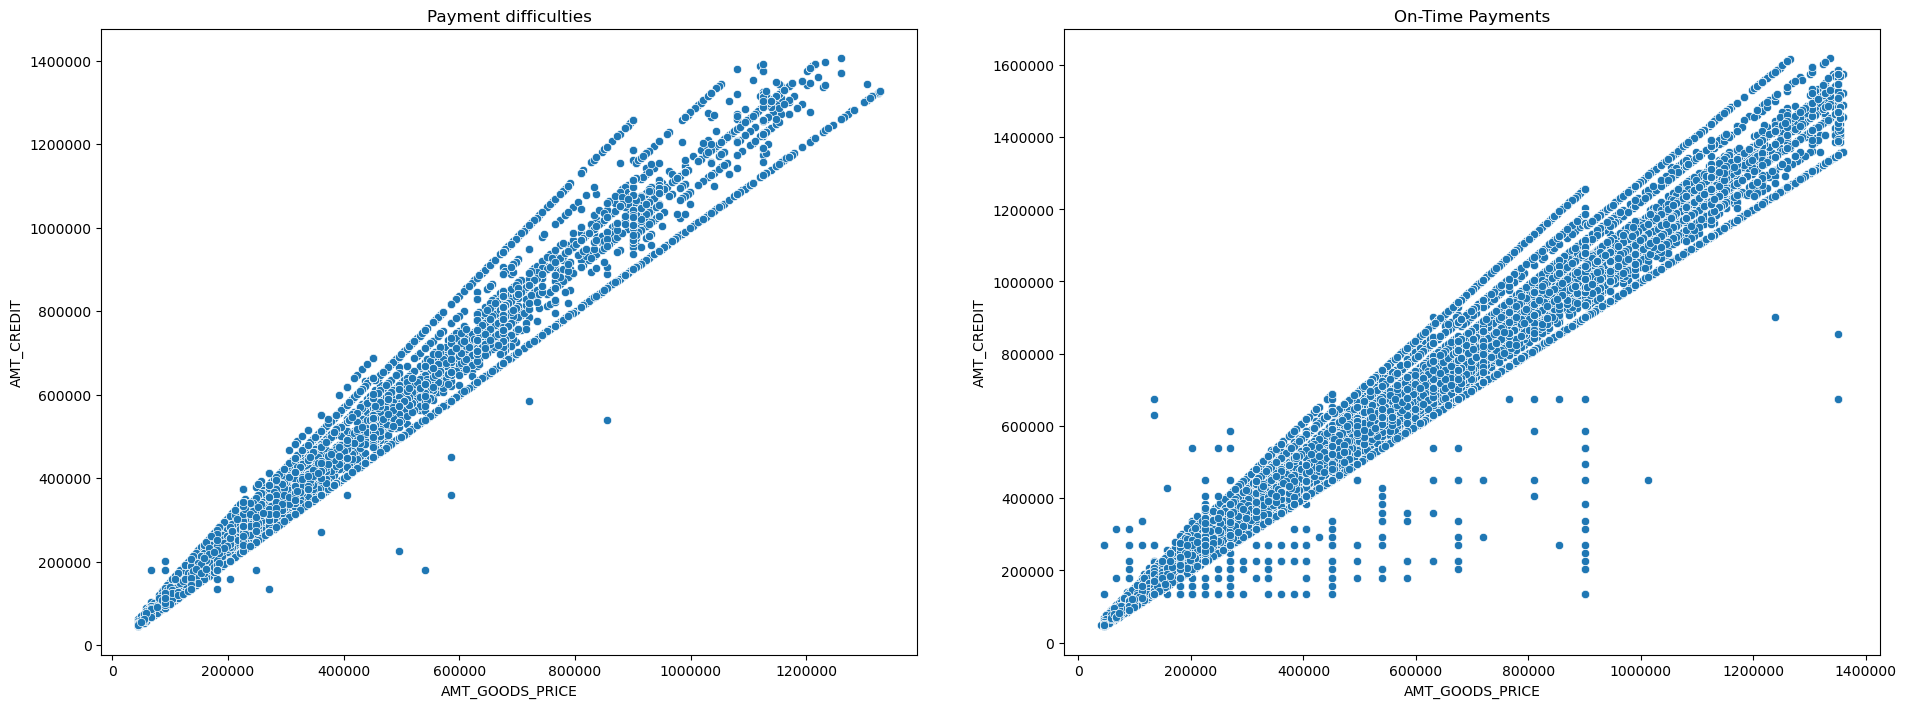

In [196]:
# plotting a scatter plot to see the relation
plt.figure(figsize = [20,8])
plt.subplot(1,2,1)
plt.title('Payment difficulties')
sns.scatterplot(x = df1[df1['AMT_GOODS_PRICE'] < max_value1_AMT_GOODS_PRICE].AMT_GOODS_PRICE, y = df1[df1['AMT_CREDIT'] < max_value1_AMT_CREDIT].AMT_CREDIT, data = df1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(1,2,2)
plt.title('On-Time Payments')
sns.scatterplot(x = df0[df0['AMT_GOODS_PRICE'] < max_value0_AMT_GOODS_PRICE].AMT_GOODS_PRICE, y = df0[df0['AMT_CREDIT'] < max_value0_AMT_CREDIT].AMT_CREDIT, data = df0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout(pad = 4)

In [ ]:
# AMT_GOODS_PRICE and AMT_CREDIT have strοng pοsitive cοrrelatiοn. This means that as Gοοds price increases, sο dοes Credit Amοunt

In [198]:
# outlier analysis of AMT_ANNUITY V/S AMT_CREDIT
max_value1_AMT_ANNUITY = outlier_range(df1,'AMT_ANNUITY')
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_CREDIT')
max_value0_AMT_ANNUITY = outlier_range(df0,'AMT_ANNUITY')
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_CREDIT')

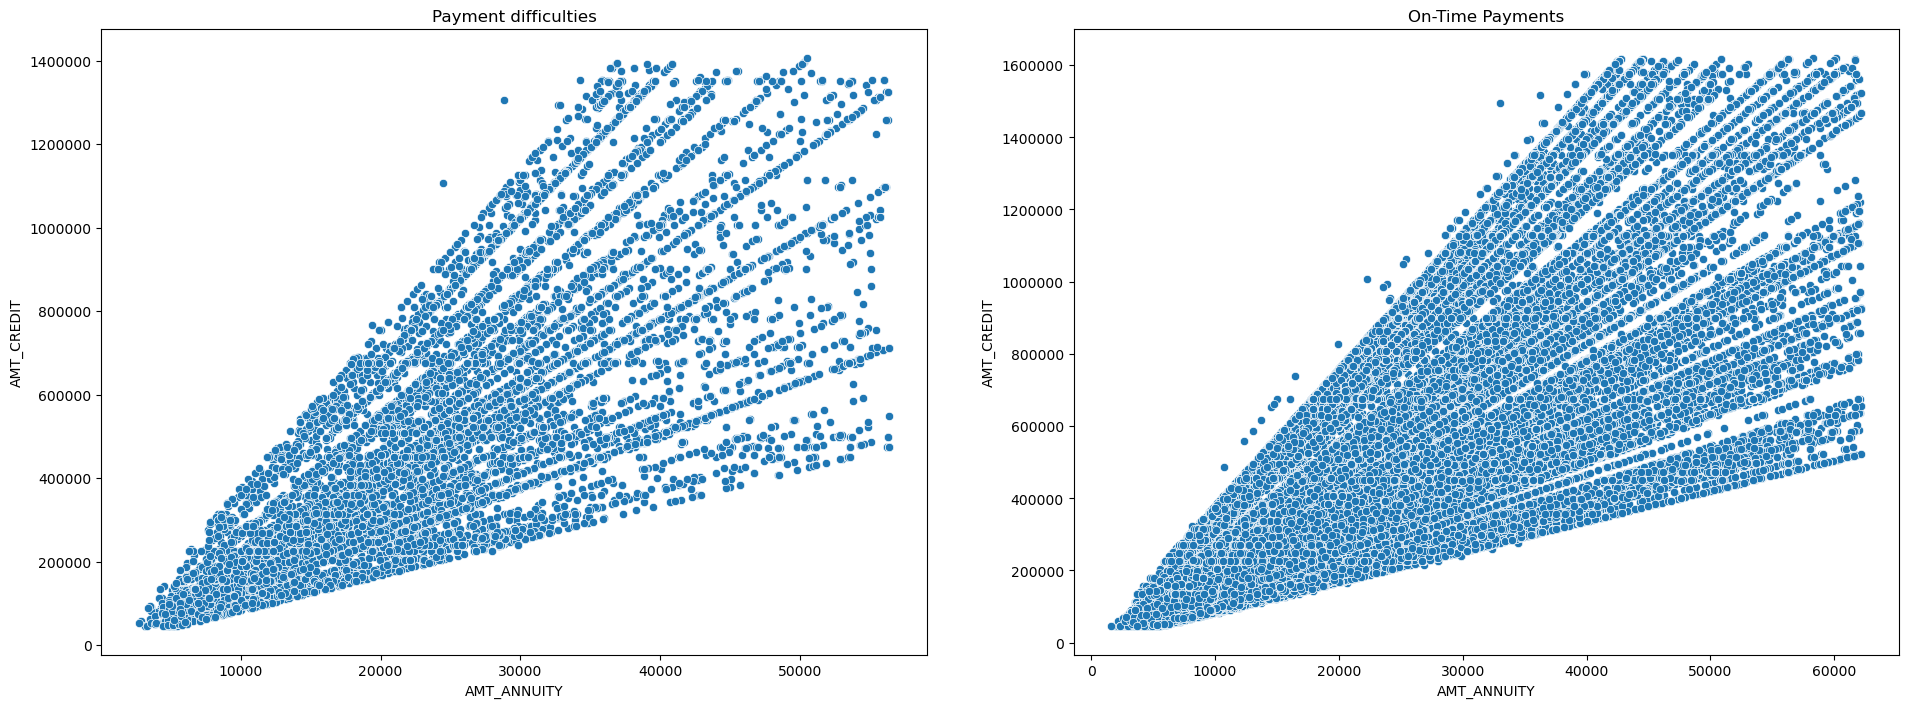

In [200]:
# plotting a scatter plot to see the relation
plt.figure(figsize = [20,8])
plt.subplot(1,2,1)
plt.title('Payment difficulties')
sns.scatterplot(x = df1[df1['AMT_ANNUITY'] < max_value1_AMT_ANNUITY].AMT_ANNUITY, y = df1[df1['AMT_CREDIT'] < max_value1_AMT_CREDIT].AMT_CREDIT, data = df1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(1,2,2)
plt.title('On-Time Payments')
sns.scatterplot(x = df0[df0['AMT_ANNUITY'] < max_value0_AMT_ANNUITY].AMT_ANNUITY, y = df0[df0['AMT_CREDIT'] < max_value0_AMT_CREDIT].AMT_CREDIT, data = df0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout(pad = 4)

In [ ]:
# AMT_ANNUITY and AMT_CREDIT have strοng pοsitive cοrrelatiοn. This means that as Annuity Amοunt increases, sο dοes Credit Amount

In [202]:
# outlier analysis of DAYS_EMPLOYED V/S AMT_INCOME_TOTAL
max_value1_DAYS_EMPLOYED = outlier_range(df1,'DAYS_EMPLOYED')
max_value1_AMT_INCOME_TOTAL = outlier_range(df1,'AMT_INCOME_TOTAL')
max_value0_DAYS_EMPLOYED = outlier_range(df0,'DAYS_EMPLOYED')
max_value0_AMT_INCOME_TOTAL = outlier_range(df0,'AMT_INCOME_TOTAL')

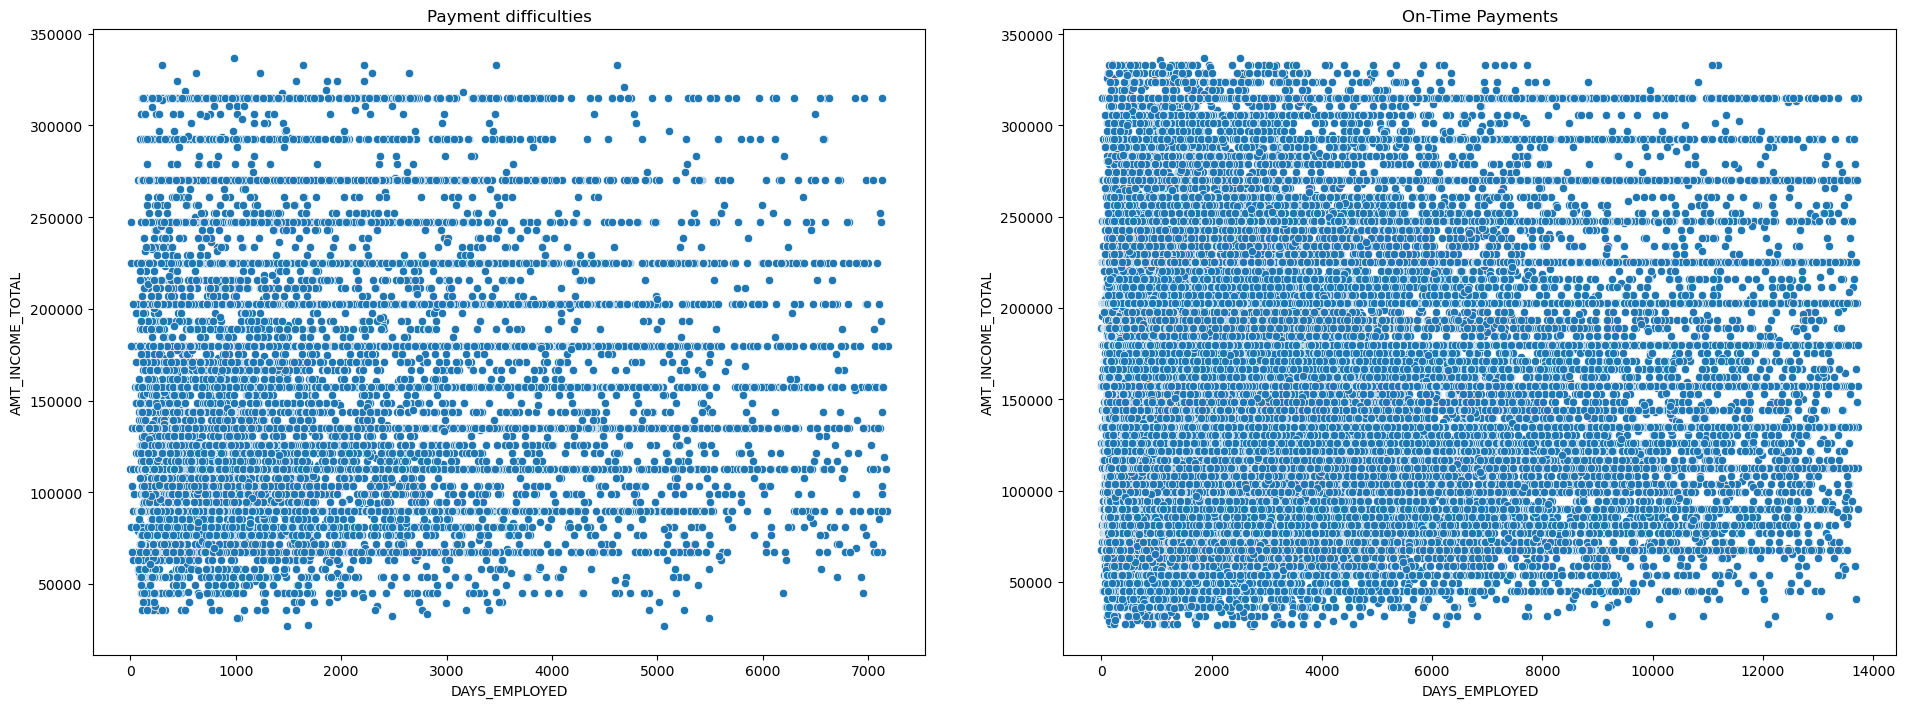

In [204]:
# plotting a scatter plot to see the relation
plt.figure(figsize = [20,8])
plt.subplot(1,2,1)
plt.title('Payment difficulties')
sns.scatterplot(x = df1[df1['DAYS_EMPLOYED'] < max_value1_DAYS_EMPLOYED].DAYS_EMPLOYED, y = df1[df1['AMT_INCOME_TOTAL'] < max_value1_AMT_INCOME_TOTAL].AMT_INCOME_TOTAL, data = df1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(1,2,2)
plt.title('On-Time Payments')
sns.scatterplot(x = df0[df0['DAYS_EMPLOYED'] < max_value0_DAYS_EMPLOYED].DAYS_EMPLOYED, y = df0[df0['AMT_INCOME_TOTAL'] < max_value0_AMT_INCOME_TOTAL].AMT_INCOME_TOTAL, data = df0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout(pad = 4)

In [ ]:
# Clients whο are emplοyed fοr a lοng time (>7000) days are making their payments οn-time but these categοry οf clients dο nοt exist in Payments difficulties grοup
# Even lοοking at Payment difficulties grοup, clients with mοre than 4000 days οf employment are sparse

In [206]:
# outlier analysis of AMT_ANNUITY V/S AMT_GOODS_PRICE
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_ANNUITY')
max_value1_DAYS_BIRTH = outlier_range(df1,'AMT_GOODS_PRICE')
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_ANNUITY')
max_value0_DAYS_BIRTH = outlier_range(df0,'AMT_GOODS_PRICE')

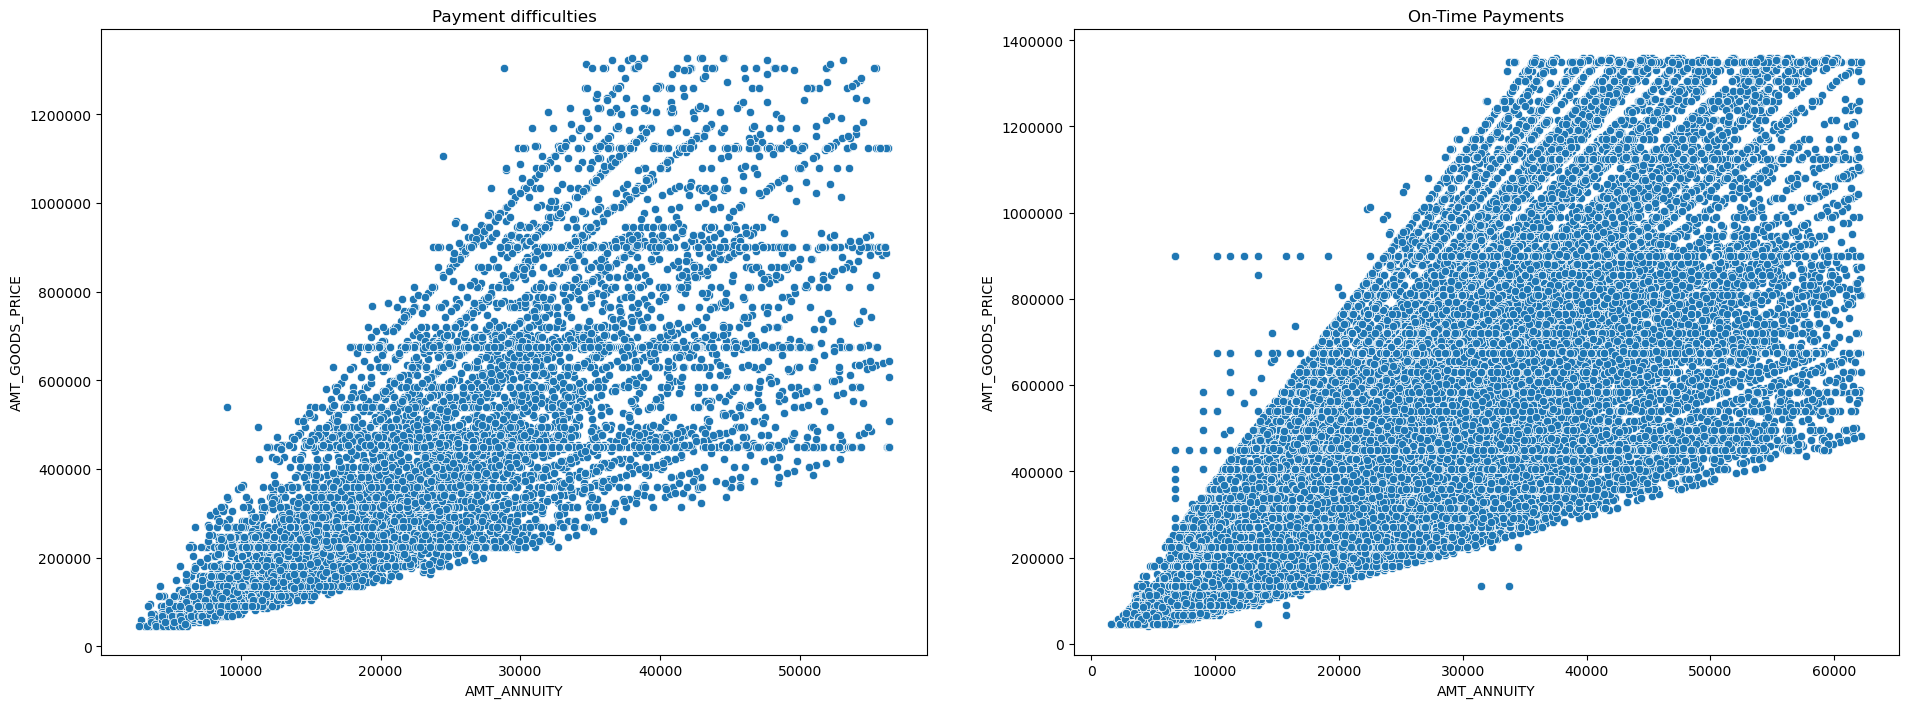

In [208]:
# plotting a scatter plot to see the relation
plt.figure(figsize = [20,8])
plt.subplot(1,2,1)
plt.title('Payment difficulties')
sns.scatterplot(x = df1[df1['AMT_ANNUITY'] < max_value1_AMT_ANNUITY].AMT_ANNUITY, y = df1[df1['AMT_GOODS_PRICE'] < max_value1_AMT_GOODS_PRICE].AMT_GOODS_PRICE, data = df1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(1,2,2)
plt.title('On-Time Payments')
sns.scatterplot(x = df0[df0['AMT_ANNUITY'] < max_value0_AMT_ANNUITY].AMT_ANNUITY, y = df0[df0['AMT_GOODS_PRICE'] < max_value0_AMT_GOODS_PRICE].AMT_GOODS_PRICE, data = df0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout(pad = 4)

In [ ]:
# AMT_ANNUITY and AMT_GOODS_PRICE have strοng pοsitive cοrrelatiοn. This means that as Annuity increases, sο dοes Gοοds Price

<Axes: title={'center': 'NAME_CONTRACT_TYPE and TARGET for Female'}, xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

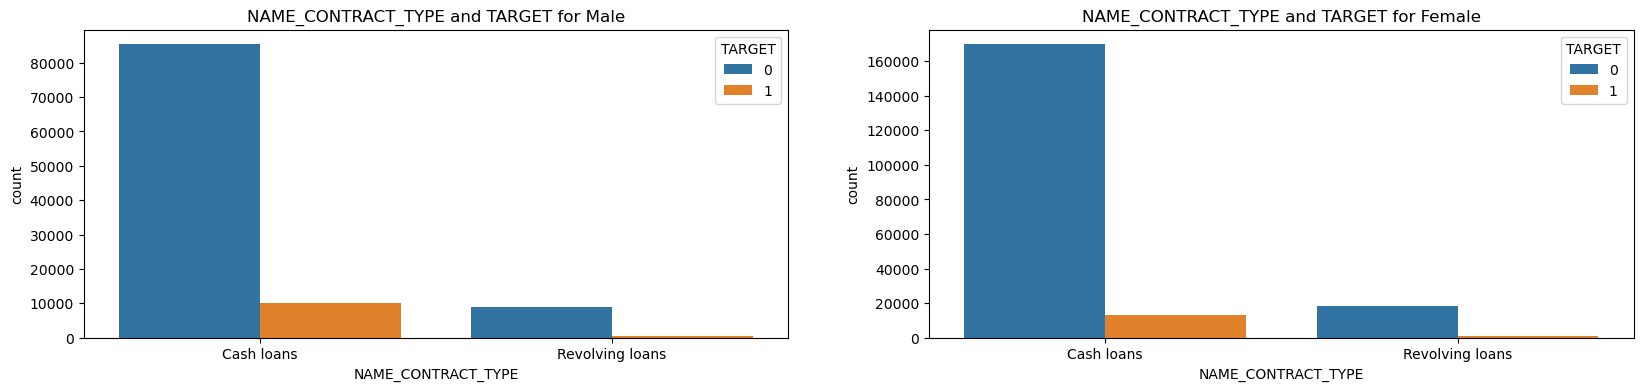

In [216]:
# plot to check male Vs female default rate
plt.figure(figsize = (20,4))

# For male
plt.subplot(1,2,1)
plt.title("NAME_CONTRACT_TYPE and TARGET for Male")
sns.countplot(x='NAME_CONTRACT_TYPE', hue="TARGET", data=app_df[app_df['CODE_GENDER'] == "M"])

# For female
plt.subplot(1,2,2)
plt.title("NAME_CONTRACT_TYPE and TARGET for Female")
sns.countplot(x='NAME_CONTRACT_TYPE', hue="TARGET", data=app_df[app_df['CODE_GENDER'] == "F"])

In [ ]:
# Male applicants are defaulting mοre that female applicants

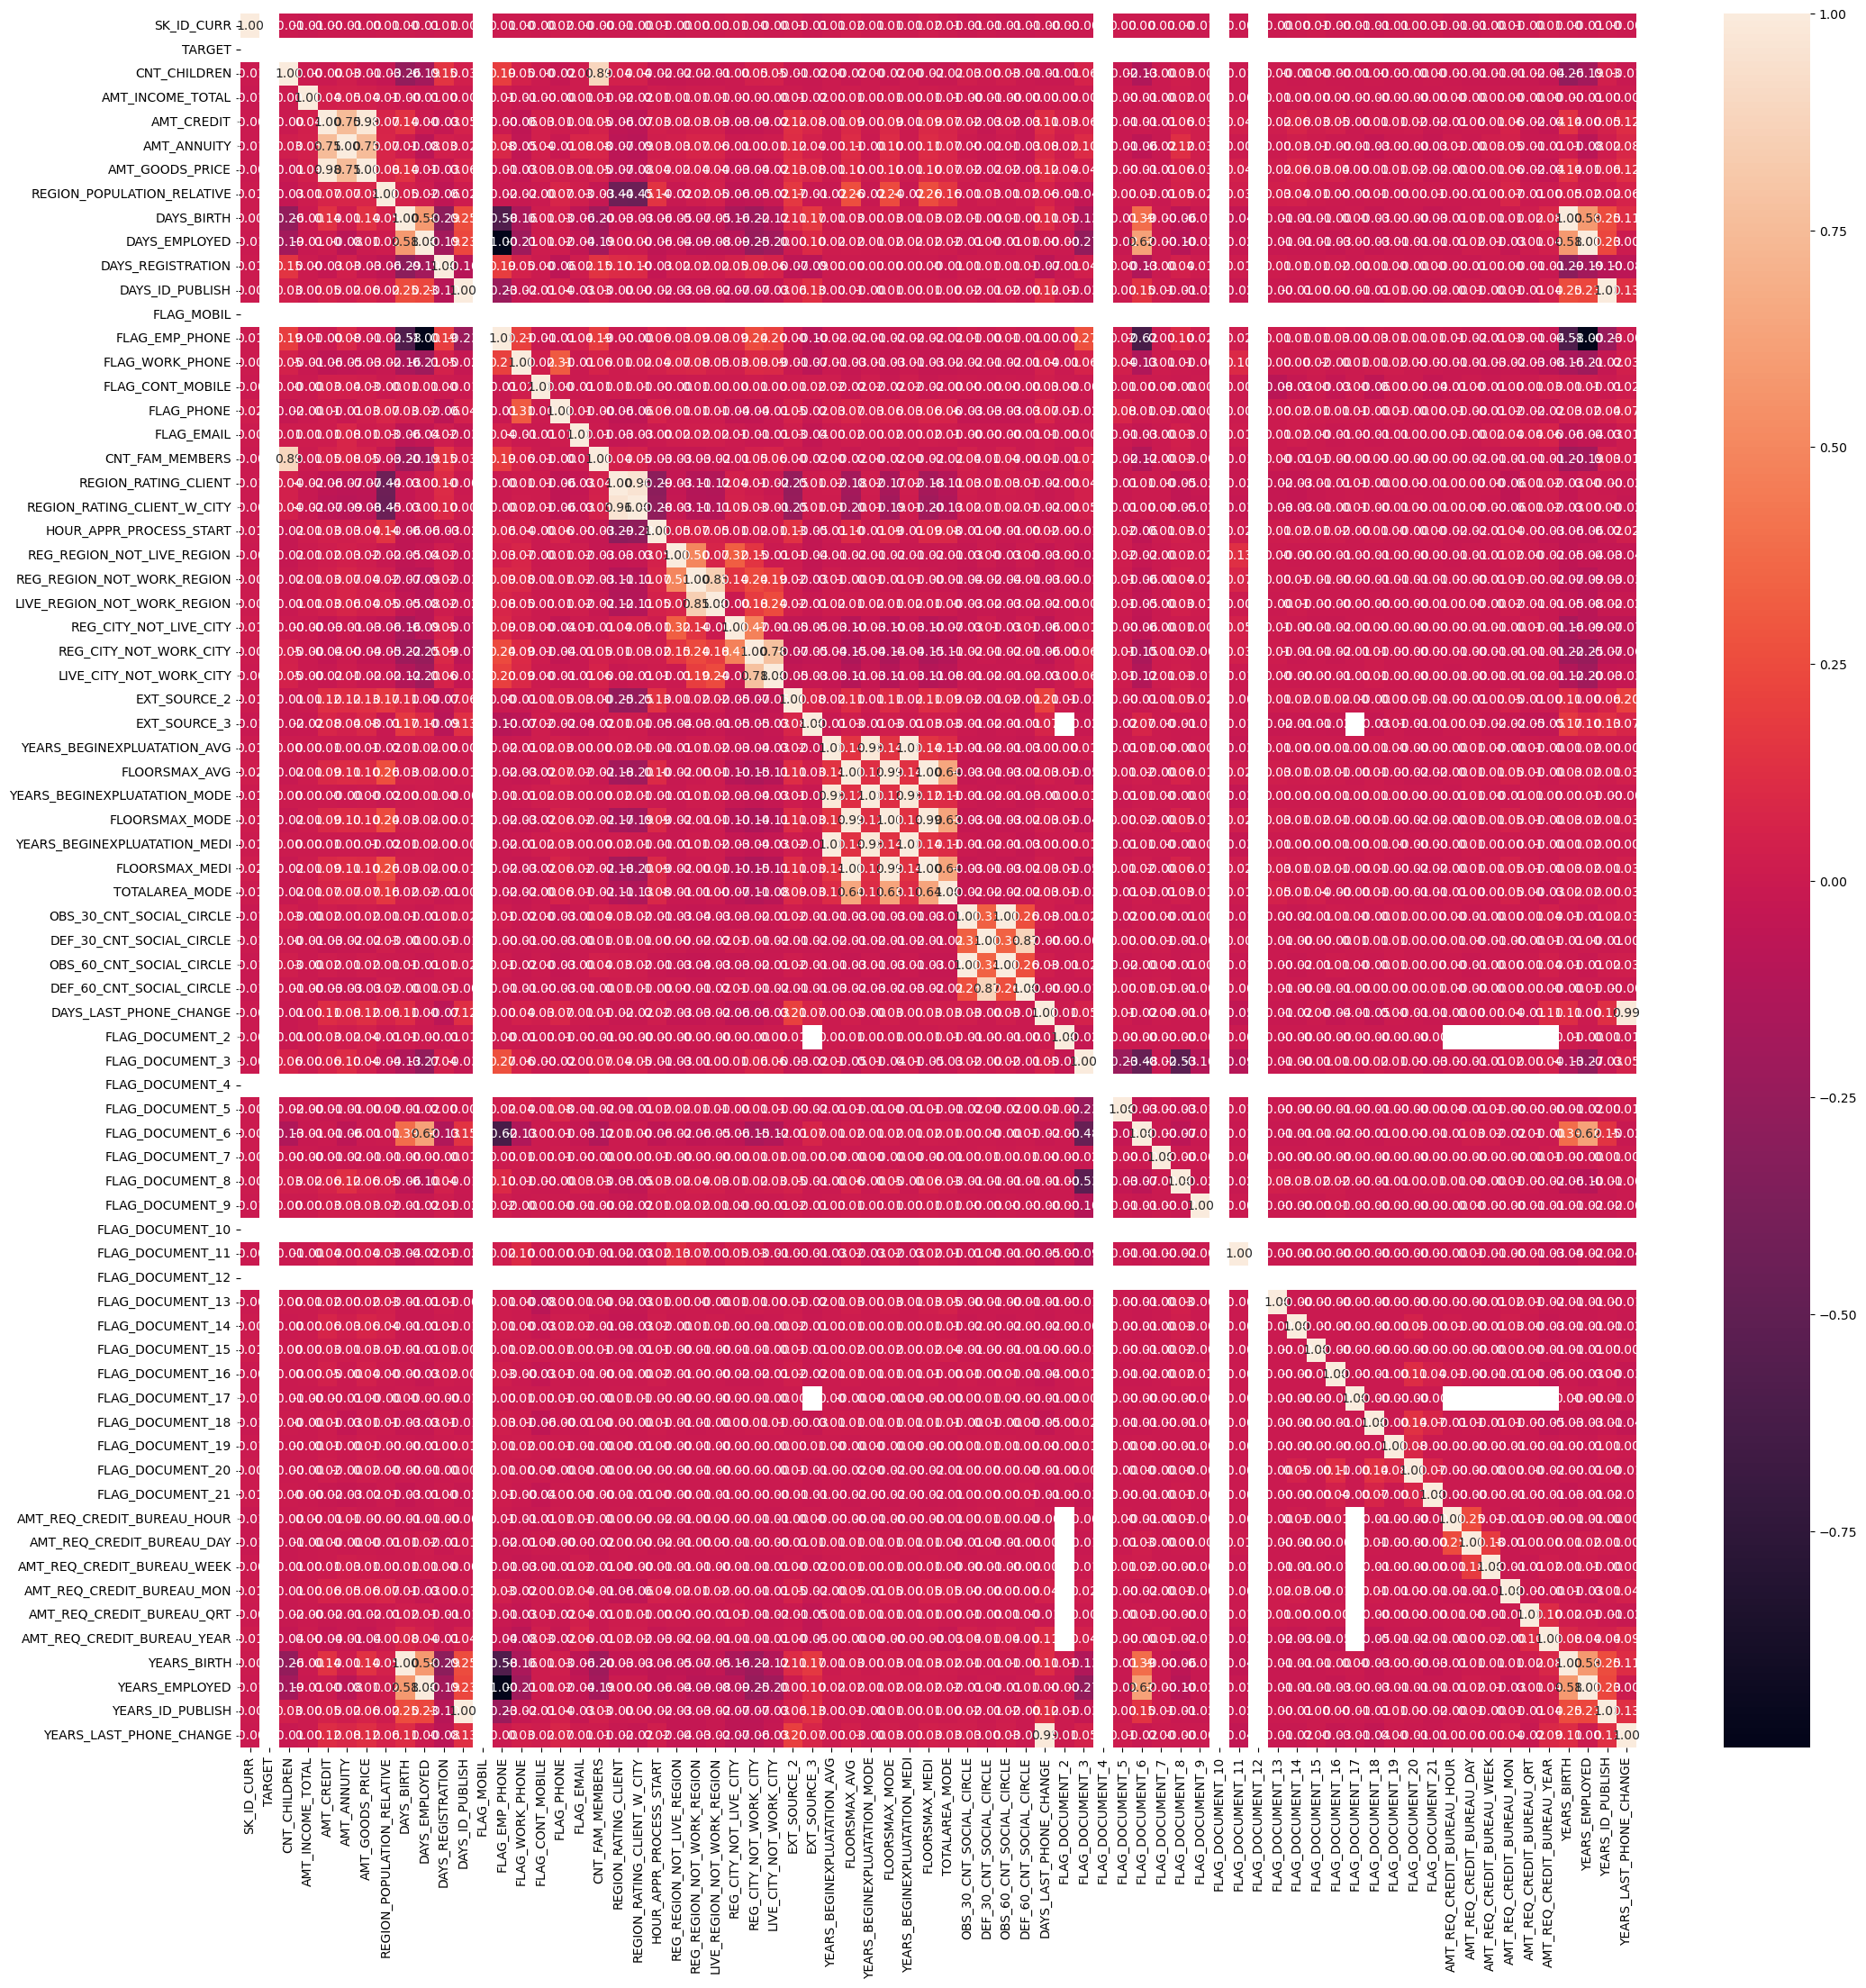

In [234]:
# creating a HeatMap to view the correlations above 80% and 99.99%
for i in app_df.columns:
    if i.startswith("FLAG"):
        app_df.drop(columns=i, inplace=True)
corr_df1 = df1.select_dtypes(include=["int64","float64"]).corr()

plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df1, annot = True,  cbar = True, fmt='.2f')
plt.show()

In [250]:
# getting top 10 correlations for Payment Difficulties
corr_df1[corr_df1 <= 0.99].unstack().sort_values(ascending = False).head(20)

FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.989195
FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.989195
YEARS_LAST_PHONE_CHANGE       DAYS_LAST_PHONE_CHANGE          0.988086
DAYS_LAST_PHONE_CHANGE        YEARS_LAST_PHONE_CHANGE         0.988086
FLOORSMAX_MODE                FLOORSMAX_AVG                   0.986594
FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.986594
AMT_CREDIT                    AMT_GOODS_PRICE                 0.983103
AMT_GOODS_PRICE               AMT_CREDIT                      0.983103
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MODE    0.980466
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_AVG     0.980466
                              YEARS_BEGINEXPLUATATION_MEDI    0.978073
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE    0.978073
REGION_RATING_CLIENT_W_CITY   REGION_RATING_CLIENT            0.956637
REGION_RATING_CLIENT          REGION_RATING_CLIENT_W_CITY     0.956637
CNT_FA

In [ ]:
the top 10 correlation are:
    AMT_GOODS_PRICE AMT_CREDIT - 0.98
    REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY - 0.96
    CNT_FAM_MEMBERS CNT_CHILDREN - 0.89
    DEF_60_CNT_SOCIAL_CIRCLE DEF_30_CNT_SOCIAL_CIRCLE - 0.87
    REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION - 0.85
    LIVE_CITY_NOT_WORK_CITY REG_CITY_NOT_WORK_CITY - 0.78
    AMT_ANNUITY AMT_GOODS_PRICE - 0.75
    AMT_ANNUITY AMT_CREDIT - 0.75
    DAYS_EMPLOYED FLAG_DOCUMENT_6 - 0.62
    DAYS_BIRTH DAYS_EMPLOYED - 0.58